In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.read_data import read_b_data
from src.features.landuse import *
import pyproj

import scrapy
from scrapy.crawler import CrawlerProcess
from twisted.internet import reactor
import scrapy
from scrapy.crawler import CrawlerRunner
from crochet import setup

from src.features.map_dataset import MapDataset
from src.visualization.mapper import *

from shapely.geometry import Polygon, MultiPoint, Point, MultiPolygon
from scipy.stats import poisson, gamma, nbinom
plt.rcParams.update({'font.size': 16})

In [4]:
url = 'http://service.nso.go.th/nso/web/statseries/statseries09.html'

url3 = 'http://service.nso.go.th/nso/web/statseries/statseries01.html'

In [3]:
data_folder = '../data/nso_data/'
report_folder = '../reports/map/'
pm_folder = '../data/pm25/'

In [9]:
res = requests.get(url)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

In [12]:
table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [3]:
header_url = 'http://service.nso.go.th/nso/web/statseries/'

In [ ]:
url = 'http://service.nso.go.th/nso/web/statseries/statseries09.html'


data_folder_labor = '../data/nso_data/health/'

res = requests.get(url)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
table_list.reverse()

for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder_labor + name
    if not os.path.exists(filename):
        try:
            wget.download(dl_url, filename)
        except:
            pass

  0%|                                                                                                                               | 0/326 [00:00<?, ?it/s]

 85% [..................................................................            ] 32768 / 38400

  0%|▎                                                                                                                      | 1/326 [00:01<08:20,  1.54s/it]

 64% [.................................................                             ] 24576 / 38400

  1%|▋                                                                                                                      | 2/326 [00:02<08:00,  1.48s/it]

 64% [.................................................                             ] 24576 / 38400

  1%|█                                                                                                                      | 3/326 [00:04<07:46,  1.44s/it]

100% [..............................................................................] 38400 / 38400

  1%|█▍                                                                                                                     | 4/326 [00:05<07:37,  1.42s/it]

100% [..............................................................................] 38400 / 38400

  2%|█▊                                                                                                                     | 5/326 [00:10<13:14,  2.47s/it]

 64% [.................................................                             ] 24576 / 38400

  2%|██▏                                                                                                                    | 6/326 [00:12<13:04,  2.45s/it]

 85% [..................................................................            ] 32768 / 38400

  2%|██▌                                                                                                                    | 7/326 [00:25<29:45,  5.60s/it]

 85% [..................................................................            ] 32768 / 38400

  2%|██▉                                                                                                                    | 8/326 [00:27<22:58,  4.33s/it]

 64% [.................................................                             ] 24576 / 38400

  3%|███▎                                                                                                                   | 9/326 [00:28<18:05,  3.42s/it]

 85% [..................................................................            ] 32768 / 38400

  3%|███▌                                                                                                                  | 10/326 [00:36<25:27,  4.83s/it]

 92% [........................................................................      ] 32768 / 35328

  3%|███▉                                                                                                                  | 11/326 [00:44<29:41,  5.66s/it]

 64% [.................................................                             ] 24576 / 38400

  4%|████▎                                                                                                                 | 12/326 [00:49<28:12,  5.39s/it]

 64% [.................................................                             ] 24576 / 38400

  4%|████▋                                                                                                                 | 13/326 [00:50<21:48,  4.18s/it]

 43% [.................................                                             ] 16384 / 37888

  4%|█████                                                                                                                 | 14/326 [00:51<17:03,  3.28s/it]

 61% [................................................                              ] 24576 / 39936

  5%|█████▍                                                                                                                | 15/326 [00:57<20:46,  4.01s/it]

 43% [.................................                                             ] 16384 / 37888

  5%|█████▊                                                                                                                | 16/326 [00:58<16:38,  3.22s/it]

 87% [....................................................................          ] 32768 / 37376

  5%|██████▏                                                                                                               | 17/326 [01:00<14:17,  2.77s/it]

 64% [..................................................                            ] 24576 / 37888

  6%|██████▌                                                                                                               | 18/326 [01:03<14:35,  2.84s/it]

 88% [.....................................................................         ] 32768 / 36864

  6%|██████▉                                                                                                               | 19/326 [01:04<12:29,  2.44s/it]

 43% [.................................                                             ] 16384 / 37888

  6%|███████▏                                                                                                              | 20/326 [01:06<10:53,  2.14s/it]

 43% [.................................                                             ] 16384 / 37888

  6%|███████▌                                                                                                              | 21/326 [01:07<09:23,  1.85s/it]

 86% [...................................................................           ] 32768 / 37888

  7%|███████▉                                                                                                              | 22/326 [01:11<13:06,  2.59s/it]

 64% [..................................................                            ] 24576 / 37888

  7%|████████▎                                                                                                             | 23/326 [01:13<11:27,  2.27s/it]

 80% [..............................................................                ] 32768 / 40960

  7%|████████▋                                                                                                             | 24/326 [01:14<10:13,  2.03s/it]

 86% [...................................................................           ] 32768 / 37888

  8%|█████████                                                                                                             | 25/326 [01:19<14:28,  2.89s/it]

 64% [..................................................                            ] 24576 / 37888

  8%|█████████▍                                                                                                            | 26/326 [01:23<16:17,  3.26s/it]

 43% [.................................                                             ] 16384 / 37888

  8%|█████████▊                                                                                                            | 27/326 [01:25<13:22,  2.68s/it]

 86% [...................................................................           ] 32768 / 37888

  9%|██████████▏                                                                                                           | 28/326 [01:36<25:32,  5.14s/it]

 64% [..................................................                            ] 24576 / 37888

  9%|██████████▍                                                                                                           | 29/326 [01:37<20:05,  4.06s/it]

 43% [.................................                                             ] 16384 / 37888

  9%|██████████▊                                                                                                           | 30/326 [01:40<18:48,  3.81s/it]

 65% [...................................................                           ] 24576 / 37376

 10%|███████████▏                                                                                                          | 31/326 [01:42<15:19,  3.12s/it]

 64% [..................................................                            ] 24576 / 37888

 10%|███████████▌                                                                                                          | 32/326 [01:43<13:02,  2.66s/it]

 86% [...................................................................           ] 32768 / 37888

 10%|███████████▋                                                                                                        | 33/326 [03:08<2:13:15, 27.29s/it]

 86% [...................................................................           ] 32768 / 37888

 10%|████████████                                                                                                        | 34/326 [03:14<1:42:04, 20.98s/it]

 64% [..................................................                            ] 24576 / 37888

 11%|████████████▍                                                                                                       | 35/326 [03:16<1:13:32, 15.16s/it]

 86% [...................................................................           ] 32768 / 37888

 11%|█████████████                                                                                                         | 36/326 [03:19<56:06, 11.61s/it]

 86% [...................................................................           ] 32768 / 37888

 11%|█████████████▍                                                                                                        | 37/326 [03:28<51:06, 10.61s/it]

 65% [...................................................                           ] 24576 / 37376

 12%|█████████████▊                                                                                                        | 38/326 [03:29<37:34,  7.83s/it]

 64% [..................................................                            ] 24576 / 37888

 12%|██████████████                                                                                                        | 39/326 [03:41<44:01,  9.20s/it]

 86% [...................................................................           ] 32768 / 37888

 12%|██████████████▍                                                                                                       | 40/326 [03:45<35:48,  7.51s/it]

 86% [...................................................................           ] 32768 / 37888

 13%|██████████████▊                                                                                                       | 41/326 [03:46<27:09,  5.72s/it]

 86% [...................................................................           ] 32768 / 37888

 13%|███████████████▏                                                                                                      | 42/326 [03:48<21:03,  4.45s/it]

 76% [...........................................................                   ] 32768 / 43008

 13%|███████████████▌                                                                                                      | 43/326 [03:50<17:02,  3.61s/it]

 75% [..........................................................                    ] 32768 / 43520

 13%|███████████████▉                                                                                                      | 44/326 [03:52<15:24,  3.28s/it]

 87% [....................................................................          ] 32768 / 37376

 14%|████████████████▎                                                                                                     | 45/326 [03:54<13:12,  2.82s/it]

 87% [....................................................................          ] 32768 / 37376

 14%|████████████████▋                                                                                                     | 46/326 [03:56<11:34,  2.48s/it]

 76% [...........................................................                   ] 32768 / 43008

 14%|█████████████████                                                                                                     | 47/326 [03:57<10:14,  2.20s/it]

 43% [.................................                                             ] 16384 / 37888

 15%|█████████████████▎                                                                                                    | 48/326 [03:59<09:42,  2.10s/it]

 64% [..................................................                            ] 24576 / 37888

 15%|█████████████████▋                                                                                                    | 49/326 [04:00<08:46,  1.90s/it]

 75% [..........................................................                    ] 32768 / 43520

 15%|██████████████████                                                                                                    | 50/326 [04:05<13:01,  2.83s/it]

 87% [....................................................................          ] 32768 / 37376

 16%|██████████████████▍                                                                                                   | 51/326 [04:26<37:24,  8.16s/it]

 86% [...................................................................           ] 32768 / 37888

 16%|██████████████████▊                                                                                                   | 52/326 [04:34<37:07,  8.13s/it]

 94% [.........................................................................     ] 40960 / 43520

 16%|███████████████████▏                                                                                                  | 53/326 [04:42<36:30,  8.02s/it]

 76% [...........................................................                   ] 32768 / 43008

 17%|███████████████████▌                                                                                                  | 54/326 [04:44<27:48,  6.13s/it]

 85% [..................................................................            ] 32768 / 38400

 17%|███████████████████▉                                                                                                  | 55/326 [04:45<21:36,  4.78s/it]

 75% [..........................................................                    ] 32768 / 43520

 17%|████████████████████▎                                                                                                 | 56/326 [04:47<17:26,  3.88s/it]

 85% [..................................................................            ] 32768 / 38400

 17%|████████████████████▋                                                                                                 | 57/326 [05:01<30:32,  6.81s/it]

 56% [............................................                                  ] 24576 / 43520

 18%|████████████████████▉                                                                                                 | 58/326 [05:08<30:43,  6.88s/it]

 75% [..........................................................                    ] 32768 / 43520

 18%|█████████████████████▎                                                                                                | 59/326 [05:14<29:55,  6.72s/it]

 38% [.............................                                                 ] 16384 / 43008

 18%|█████████████████████▋                                                                                                | 60/326 [05:15<22:50,  5.15s/it]

 94% [.........................................................................     ] 40960 / 43520

 19%|██████████████████████                                                                                                | 61/326 [05:17<17:43,  4.01s/it]

 43% [..................................                                            ] 16384 / 37376

 19%|██████████████████████▍                                                                                               | 62/326 [05:18<14:15,  3.24s/it]

 64% [.................................................                             ] 24576 / 38400

 19%|██████████████████████▊                                                                                               | 63/326 [05:21<13:59,  3.19s/it]

 86% [...................................................................           ] 32768 / 37888

 20%|███████████████████████▏                                                                                              | 64/326 [05:26<16:19,  3.74s/it]

 75% [..........................................................                    ] 32768 / 43520

 20%|███████████████████████▌                                                                                              | 65/326 [05:32<18:21,  4.22s/it]

 64% [.................................................                             ] 24576 / 38400

 20%|███████████████████████▉                                                                                              | 66/326 [05:33<14:30,  3.35s/it]

 75% [..........................................................                    ] 32768 / 43520

In [ ]:
url2 = 'http://service.nso.go.th/nso/web/statseries/statseries03.html'

data_folder_labor = '../data/nso_data/labor/'

res = requests.get(url2)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder_labor + name
    if not os.path.exists(filename):
        try:
            wget.download(dl_url, filename)
        except:
            pass

In [ ]:
url3 = 'http://service.nso.go.th/nso/web/statseries/statseries01.html'

data_folder  = '../data/nso_data/population/'

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [ ]:
url4 = 'http://service.nso.go.th/nso/web/statseries/statseries11.html'

data_folder  = '../data/nso_data/income/'

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [ ]:
url5 = 'http://service.nso.go.th/nso/web/statseries/statseries14.html'

data_folder  = '../data/nso_data/landuse/'

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [ ]:
url6 = 'http://service.nso.go.th/nso/web/statseries/statseries16.html'

data_folder  = '../data/nso_data/industry/'
os.makedir(data_folder)

res = requests.get(url3)
# create a soup object of Berkeley earth website
soup = BeautifulSoup(res.text, features="lxml")

table_list = []
for link in soup.find_all('a'):
    if 'tables' in link.get('href'):
        table_list.append(link.get('href'))
        
for link in tqdm(table_list):
    dl_url = header_url + link
    name = '_'.join(link.split('/')[1:])
    filename = data_folder + name
    
    try:
        wget.download(dl_url, filename)
    except:
        pass

In [2]:
url_list = ['http://service.nso.go.th/nso/web/statseries/statseries16.html', 
            'http://service.nso.go.th/nso/web/statseries/statseries14.html', 
            'http://service.nso.go.th/nso/web/statseries/statseries11.html',
            'http://service.nso.go.th/nso/web/statseries/statseries01.html',
            'http://service.nso.go.th/nso/web/statseries/statseries03.html',
            'http://service.nso.go.th/nso/web/statseries/statseries09.html'
           ]


folder_list = ['../data/nso_data/industry/', 
              '../data/nso_data/landuse/', 
              '../data/nso_data/income/', 
              '../data/nso_data/population/',
              '../data/nso_data/labor/', '../data/nso_data/health/']

In [8]:
url_folder_tuple = []
header_url = 'http://service.nso.go.th/nso/web/statseries/'

for url, folder in tqdm(zip(url_list, folder_list)):
    if not os.path.exists(folder):
        os.mkdir(folder)
    res = requests.get(url)
    # create a soup object of Berkeley earth website
    soup = BeautifulSoup(res.text, features="lxml")
    
    table_len = 0 
    
    for link in soup.find_all('a'):
        if 'tables' in link.get('href'):
            dl_url =   link.get('href')
            name = '_'.join(dl_url.split('/')[1:])
            filename = folder + name
            url_folder_tuple.append([header_url + dl_url, filename])
            table_len += 1
            
    print(url, folder, table_len)

1it [00:01,  1.44s/it]

http://service.nso.go.th/nso/web/statseries/statseries16.html ../data/nso_data/industry/ 83


2it [00:02,  1.45s/it]

http://service.nso.go.th/nso/web/statseries/statseries14.html ../data/nso_data/landuse/ 161


3it [00:04,  1.49s/it]

http://service.nso.go.th/nso/web/statseries/statseries11.html ../data/nso_data/income/ 5


4it [00:06,  1.54s/it]

http://service.nso.go.th/nso/web/statseries/statseries01.html ../data/nso_data/population/ 168


5it [00:08,  1.66s/it]

http://service.nso.go.th/nso/web/statseries/statseries03.html ../data/nso_data/labor/ 328


6it [00:09,  1.62s/it]

http://service.nso.go.th/nso/web/statseries/statseries09.html ../data/nso_data/health/ 326


In [2]:
def download_url(arr):
    
    download_url = arr[0]
    filename = arr[1]
    
    if not os.path.exists(filename):
        try:
            wget.download(download_url, filename)
        except:
            pass
    

In [6]:
download_url(url_folder_tuple[50])

100% [..............................................................................] 28672 / 28672

In [5]:
np.random.shuffle(url_folder_tuple)

In [6]:
Parallel(n_jobs=-1)(delayed(download_url)(arr=arr) for arr in tqdm(url_folder_tuple))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1071/1071 [02:45<00:00,  6.49it/s]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# New Links

In [8]:
url_list = ['http://statbbi.nso.go.th/staticreport/page/sector/th/01.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/02.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/05.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/07.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/08.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/11.aspx',
            'http://statbbi.nso.go.th/staticreport/page/sector/th/21.aspx'
           ]

head_folder = '../data/nso_data/'
folder_list = [head_folder + 'pop1/', 
              head_folder + 'labor1/',
              head_folder + 'health1/',
              head_folder + 'proverty1/',
              head_folder + 'income1/',
              head_folder + 'agri1/', 
               head_folder + 'resource/']

In [9]:
url_folder_tuple = []
header_url = 'http://statbbi.nso.go.th/staticreport/'

for url, folder in tqdm(zip(url_list, folder_list)):
    if not os.path.exists(folder):
        os.mkdir(folder)
    res = requests.get(url)
    # create a soup object of Berkeley earth website
    soup = BeautifulSoup(res.text, features="lxml")
    
    table_len = 0 
    
    for link in soup.find_all('a'):
        if '../../../' in link.get('href'):
            dl_url =   link.get('href')
            dl_url = dl_url.replace('../../../', '')
            name = '_'.join(dl_url.split('/')[1:])
            filename = folder + name
            url_folder_tuple.append([header_url + dl_url, filename])
            table_len += 1
            
    print(url, folder, table_len)

1it [00:00,  1.02it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/01.aspx ../data/nso_data/pop1/ 40


2it [00:01,  1.02it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/02.aspx ../data/nso_data/labor1/ 22


3it [00:02,  1.06it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/05.aspx ../data/nso_data/health1/ 21


4it [00:03,  1.13it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/07.aspx ../data/nso_data/proverty1/ 3


5it [00:04,  1.19it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/08.aspx ../data/nso_data/income1/ 10


6it [00:04,  1.26it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/11.aspx ../data/nso_data/agri1/ 13


7it [00:05,  1.17it/s]

http://statbbi.nso.go.th/staticreport/page/sector/th/21.aspx ../data/nso_data/resource/ 30


In [10]:
np.random.shuffle(url_folder_tuple)

In [ ]:
Parallel(n_jobs=-1)(delayed(download_url)(arr=arr) for arr in tqdm(url_folder_tuple))


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 100/139 [00:25<00:10,  3.65it/s]

# Explore Health Data

In [3]:
data_folder = '../data/nso_data/'

In [120]:
income1 = pd.read_excel(data_folder + 'income_prov/income.xlsx')
income1.columns = income1.iloc[1]
income1 = income1.iloc[2:, 1:]
income1 = income1.set_index('จังหวัด')
# convert year to Christian year
income1.columns = income1.columns.astype(int) - 543
income1 = income1.dropna()
income1 = income1[[2017, 2019]].reset_index()

In [124]:
income2 = pd.read_excel(data_folder + 'income_prov/income1.xls')
income2.set_index('รายได้เฉลี่ยต่อเดือนต่อครัวเรือน จำแนกตามภาค และจังหวัด พ.ศ. 2541 - 2558')
income2.columns = income2.iloc[3]
income2 = income2.iloc[5:]

thainame = income2.iloc[:, 0].dropna().values
thainame = [ s.rstrip().lstrip() for s in thainame]

income2 = income2.iloc[:, 2:]
income2.columns = income2.columns.dropna().to_list() + ['province'] 
income2 = income2.set_index('province')
income2.columns = income2.columns.astype(int)
income2 = income2.dropna(how='all')

income2['thaiprov'] = thainame[:-2]
income2 = income2.reset_index()
 

In [125]:
income2.head()

,province,1998,2000,2002,2004,2006,2007,2009,2011,2013,2015,thaiprov
0,Whole Kingdom,12492.0,12150.0,13736.0,14963.0,17787.0,18660.0,20904.0,23235.9,25194.0,26914.846584,ทั่วราชอาณาจักร
1,Greater Bangkok,24929.0,25242.0,28239.0,28135.0,33088.0,35007.0,37732.0,41630.6,43058.0,41002.390519,ตอนพิเศษ
2,Bangkok,26054.0,26909.0,29589.0,29843.0,36658.0,39020.0,42380.0,48951.0,49190.8,45571.700000,กรุงเทพมหานคร
3,Samut Prakan,18100.0,15745.0,19680.0,19946.0,20382.0,21302.0,23359.0,23797.9,29575.3,25457.200000,สมุทรปราการ
4,Nonthaburi,24211.0,24566.0,29119.0,26658.0,31152.0,32743.0,34626.0,35119.7,30663.6,36884.000000,นนทบุรี


In [129]:
income = income2.merge(income1, left_on='thaiprov', right_on='จังหวัด', how='outer')
income = income.drop(['จังหวัด'], axis=1)

In [130]:
income.to_csv(data_folder + 'income_prov/income_98_19.csv', index=False)

# Income data

In [165]:
income = pd.read_csv(data_folder + 'income_prov/income_98_19.csv')
income = income.drop('thaiprov', axis=1).set_index('province')
income.columns = income.columns.astype(int)
income.head()

,1998,2000,2002,2004,2006,2007,2009,2011,2013,2015,2017,2019
province,,,,,,,,,,,,
Whole Kingdom,12492.0,12150.0,13736.0,14963.0,17787.0,18660.0,20904.0,23235.9,25194.0,26914.846584,26946.43,26018.42
Greater Bangkok,24929.0,25242.0,28239.0,28135.0,33088.0,35007.0,37732.0,41630.6,43058.0,41002.390519,NaN,NaN
Bangkok,26054.0,26909.0,29589.0,29843.0,36658.0,39020.0,42380.0,48951.0,49190.8,45571.700000,45707.31,39459.36
Samut Prakan,18100.0,15745.0,19680.0,19946.0,20382.0,21302.0,23359.0,23797.9,29575.3,25457.200000,28711.77,24729.42
Nonthaburi,24211.0,24566.0,29119.0,26658.0,31152.0,32743.0,34626.0,35119.7,30663.6,36884.000000,40860.88,37502.22


In [204]:
avg_income = income.mean(axis=1).astype(int).sort_values()
cm_income = avg_income.loc['Chiang Mai']
near_income = avg_income[(avg_income < cm_income +1000) & (avg_income > cm_income - 2000) ]
near_income = near_income.drop(['Northeastern Region', 'Northern Region'])

In [241]:
# regions map

temp = pd.read_csv(data_folder + 'income_prov/income_98_19.csv')
provinces = temp[['province', 'thaiprov']]
provinces = pd.concat([provinces,  provinces[provinces.isin(regions)]['province']], axis=1)
provinces = provinces.fillna(method='ffill')
provinces.columns = ['province', 'thaiprov', 'region']

provinces.head()

,province,thaiprov,region
0,Whole Kingdom,ทั่วราชอาณาจักร,Whole Kingdom
1,Greater Bangkok,ตอนพิเศษ,Greater Bangkok
2,Bangkok,กรุงเทพมหานคร,Greater Bangkok
3,Samut Prakan,สมุทรปราการ,Greater Bangkok
4,Nonthaburi,นนทบุรี,Greater Bangkok


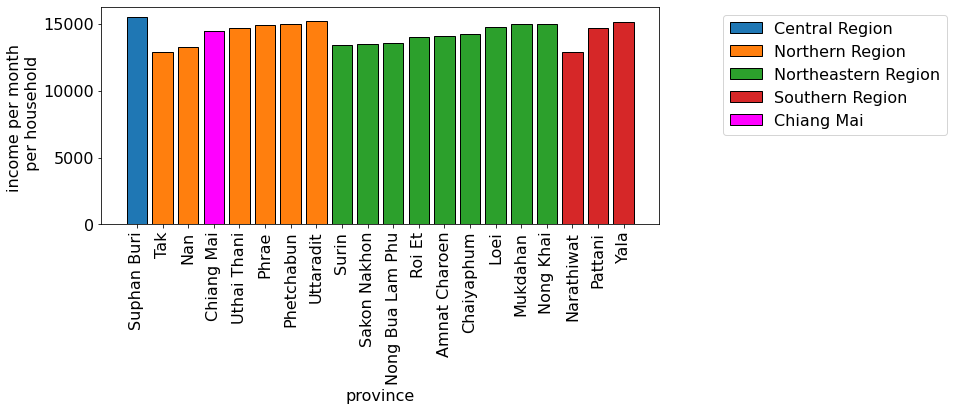

In [268]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

province_list = []
for region in provinces['region'].unique():
    # select province
    prov_in_region = provinces[provinces['region'] == region]['province'].to_list()
    df = near_income[near_income.index.isin(prov_in_region)]
    province_list += df.index.to_list()
    if len(df) > 0:
        ax.bar(df.index, df, label=region, edgecolor='black')
 
df = near_income.loc[['Chiang Mai']]
ax.bar(df.index, df, color='magenta', label='Chiang Mai', edgecolor='black')

ax.legend(bbox_to_anchor=(1.1, 1.0))
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_xlabel('province')
ax.set_ylabel('income per month \n per household');


In [184]:
avg_income.index[avg_income.index.str.contains('Region')]

Index(['Northeastern Region', 'Northern Region', 'Central Region',
       'Southern Region'],
      dtype='object', name='province')

In [266]:
air_avg = pd.read_excel(data_folder + 'resource/air_prov_2019.xlsx', header=[2, 3, 4, 5], na_values=['#'])
# drop the first columns
air_avg = air_avg.iloc[:, 1:]
air_avg.iloc[:,0] = air_avg.iloc[:,0].fillna(method='ffill')
 

In [264]:
# selet only province and avg PM2.5
pm10_avg = pd.concat([air_avg[air_avg.columns[0]], air_avg[air_avg.columns[-4]]], axis=1).dropna()
pm10_avg.columns = ['province', 'avgPM10']
pm10_avg = pm10_avg.groupby('province').mean()

In [282]:
# obtain english to thai province map
thai_prov_list = [provinces[provinces['province']==s]['thaiprov'].values[0] for s in province_list]

In [301]:
# use thainame to look up the pm10 
pm10_short_list = []
for thai_prov, prov in zip(thai_prov_list, province_list):
    if thai_prov in pm10_avg.index:
        pm10 = pm10_avg.loc[thai_prov,'avgPM10']
    else:
        pm10 = 0
        
 
    pm10_short_list.append([prov, float(pm10)])
    
pm10_short_list = np.vstack(pm10_short_list)
pm10_short_list = pd.DataFrame(pm10_short_list, columns=['province', 'avgPM10'])
pm10_short_list['avgPM10'] = pm10_short_list['avgPM10'].astype(float)

Text(0.5, 1.0, 'average PM10 in 2019')

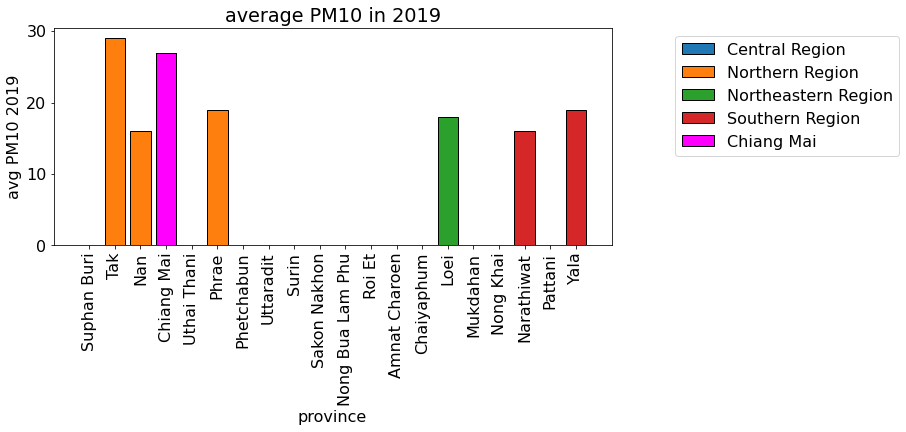

In [310]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
#ax.bar(pm10_short_list['province'], pm10_short_list['avgPM10'])

for region in provinces['region'].unique():
    # select province
    prov_in_region = provinces[provinces['region'] == region]['province'].to_list()
    df = pm10_short_list[pm10_short_list['province'].isin(prov_in_region)]
     
    if len(df) > 0:
        ax.bar(df['province'], df['avgPM10'], label=region, edgecolor='black')

df = pm10_short_list[pm10_short_list['province'] == 'Chiang Mai']
ax.bar(df['province'], df['avgPM10'], color='magenta', label='Chiang Mai', edgecolor='black')

ax.set_xlabel('province')
ax.set_ylabel('avg PM10 2019')
ax.legend(bbox_to_anchor=(1.1, 1.0))
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_title('average PM10 in 2019')

# Labor

In [329]:
files = glob(data_folder + 'labor_prov/*2.9*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file

In [330]:
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

In [389]:
agr_labor_df = []
total_df = []
for use_file, province in zip(use_files, province_list):
    labor = pd.read_excel(use_file)
    # drop the first columns 
    labor = labor.iloc[:, 1:]
    # extract year
    years = labor.iloc[3].dropna().str.replace('(', '').str.replace(')','').astype(int).to_list()
    # drop the first few rows 
    labor = labor.iloc[5:, :]
    labor.columns = ['occupation'] + years
    labor = labor[~labor[2007].isna()]

    # add gender 
    labor['gender'] = labor['occupation'][labor['occupation'].isin(['Total', 'Male', 'Female'])]
    labor['gender'] = labor['gender'].fillna(method='ffill')

    # clean up occupation columns
    labor['occupation'] = [ s.rstrip().lstrip() for s in labor['occupation']]
    agr_labor = labor[labor['occupation']== '6. Skilled agricultural and fishery workers']
    agr_labor = agr_labor[agr_labor['gender'].isin(['Male', 'Female'])]
    agr_labor = agr_labor.drop('occupation', axis=1)
    agr_labor['province'] = province
    agr_labor_df.append(agr_labor)
    
    total = labor[labor['occupation'] == 'Total']
    total = total.drop('occupation', axis=1)
    total['province'] = province
    total_df.append(total)
    
agr_labor_df = pd.concat(agr_labor_df, ignore_index=True)
total_df = pd.concat(total_df, ignore_index=True)

In [387]:
total = labor[labor['occupation'] == 'Total']
total = total.drop('occupation', axis=1)

In [393]:
labor_2016 = agr_labor_df[[2016, 'gender', 'province']]

Text(0, 0.5, 'population in\nskilled agricultural\nand fishery workers')

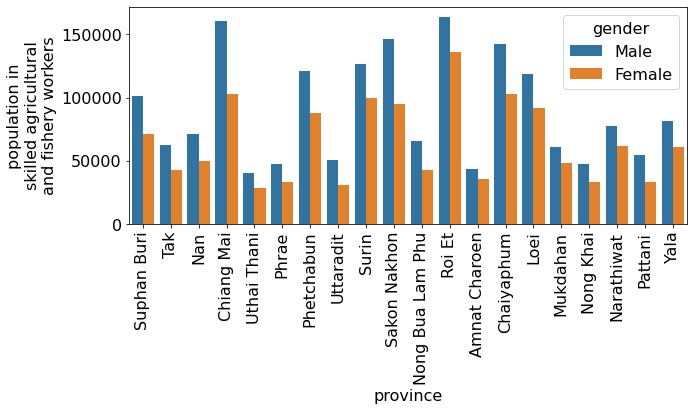

In [380]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.barplot(x='province', y=2016, hue='gender', data=labor_2016, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('population in\nskilled agricultural\nand fishery workers')

In [410]:
df1 = labor_2016[labor_2016['gender'] == 'Male']
df1[2016] = (df1[2016].values/total_df[2016].values)*100 
df1[2016] = df1[2016].astype(int)

df2 = labor_2016[labor_2016['gender'] == 'Female']
df2[2016] = (df2[2016].values/total_df[2016].values)*100 
df2[2016] = df2[2016].astype(int)

percent_agr_labor = pd.concat([df1, df2])

Text(0, 0.5, 'population in\nskilled agricultural\nand fishery workers\n(%)')

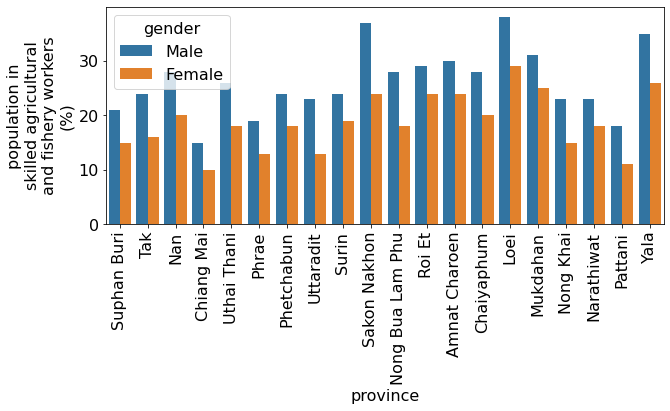

In [413]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
sns.barplot(x='province', y=2016, hue='gender', data=percent_agr_labor, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('population in\nskilled agricultural\nand fishery workers\n(%)')

# Health Outcome

In [459]:
population = pd.read_excel(data_folder + 'data/pop_province_sex_area.xlsx', header=[2])
population['จังหวัด'] = population['จังหวัด'].fillna(method='ffill')
# select total popoulation
population = population[population['รายการข้อมูล'] == 'ประชากรรวม']
population = population.set_index('จังหวัด')
population = population.iloc[:, 2:]
population.columns = (population.columns - 543).astype(int)

In [463]:
# select the short_list
pop_short_list = population.loc[thai_prov_list,:]
pop_short_list.index = province_list

## Out Patients

In [530]:
files = glob(data_folder + 'health_prov/*out*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file

In [531]:
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

In [532]:
dis_list = ['Diseases of the respiratory system', 'Certain conditions criginating in the perinatal period', 
            'Congenital malformations, deformations and chromosomal\n    abnormalities',
           'Symptoms, signs and abnormal clinical and laboratory findings,\n    not elsewhere classified']

out_patient = []

for use_file, province in zip(use_files, province_list):
    
    pat = pd.read_excel(use_file)
    # drop the first columns 
    pat = pat.iloc[:, 2:]
    # extract year
    years = pat.iloc[4].dropna().str.replace('(', '').str.replace(')','').astype(int).to_list()
    # drop the first few rows 
    pat = pat.iloc[6:, :]
    pat.columns = years + ['disease']
    pat = pat.dropna()
    pat['disease'] = [ s.rstrip().lstrip() for s in pat['disease']]
    
    focus_group = pat[pat['disease'].isin(dis_list)]
    focus_group['province'] = province
    out_patient.append(focus_group)
    
out_patient = pd.concat(out_patient, ignore_index=True)     

In [533]:
pop2014 = pop_short_list[2014]

In [534]:
res_2014 = out_patient[out_patient['disease'] =='Diseases of the respiratory system'].set_index('province')[2014]
res_2014_per = ((res_2014/pop2014)*100) 

In [535]:
birth_2014 = out_patient[out_patient['disease'] !='Diseases of the respiratory system'][[2014, 'province']]
birth_2014 = birth_2014.groupby('province').sum().iloc[:,0]
birth_2014_per = ((birth_2014/pop2014)*100) 
# rearrange index 
birth_2014_per = birth_2014_per.loc[province_list]

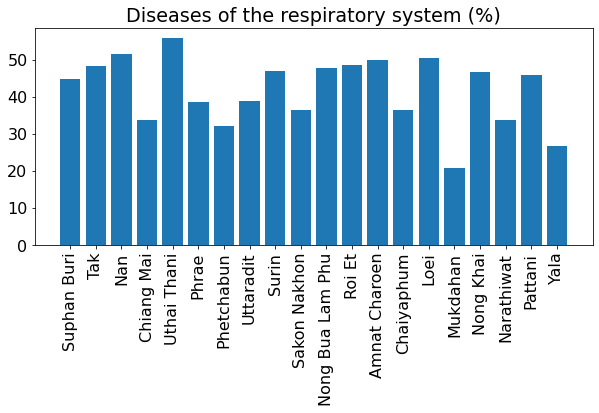

In [536]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.bar(res_2014_per.index, res_2014_per.iloc[:])
ax.set_title('Diseases of the respiratory system (%)')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


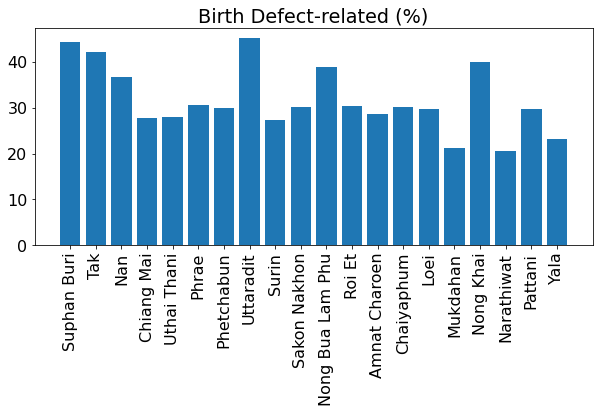

In [537]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.bar(birth_2014_per.index, birth_2014_per.iloc[:])
ax.set_title('Birth Defect-related (%)')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## In Patients

In [524]:
files = glob(data_folder + 'health_prov/*in*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

## Dead

In [577]:
sub_province_list = province_list[1:4] + province_list[-3:]
sub_province_list

['Tak', 'Nan', 'Chiang Mai', 'Narathiwat', 'Pattani', 'Yala']

In [578]:
files = glob(data_folder + 'health_prov/*rates*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in sub_province_list]
use_files = [ file_dict[s] for s in names]

In [579]:
dead_cause = []

for use_file, province in zip(use_files, sub_province_list):
    
    pat = pd.read_excel(use_file)
    
    pat = pat.iloc[:, 1:]
    # extract year
    years = pat.iloc[3].dropna().str.replace('(', '').str.replace(')','').astype(int).to_list()
    # drop the first few rows 
    pat = pat.iloc[5:, :]
    pat.columns = years + ['cause']
    pat = pat.dropna()
    pat['cause'] = [ s.rstrip().lstrip() for s in pat['cause']]
    pat['gender'] = pat['cause'][pat['cause'].isin(['Total','Male','Female'])]
    pat['gender'] = pat['gender'].fillna(method='ffill')
    sub_dead = pat[pat['cause'] =='Pneumonia and other diseases of lung']
    sub_dead['province'] = province
    sub_dead = sub_dead.drop('cause', axis=1)
    dead_cause.append(sub_dead)
    
dead_cause = pd.concat(dead_cause, ignore_index=True)

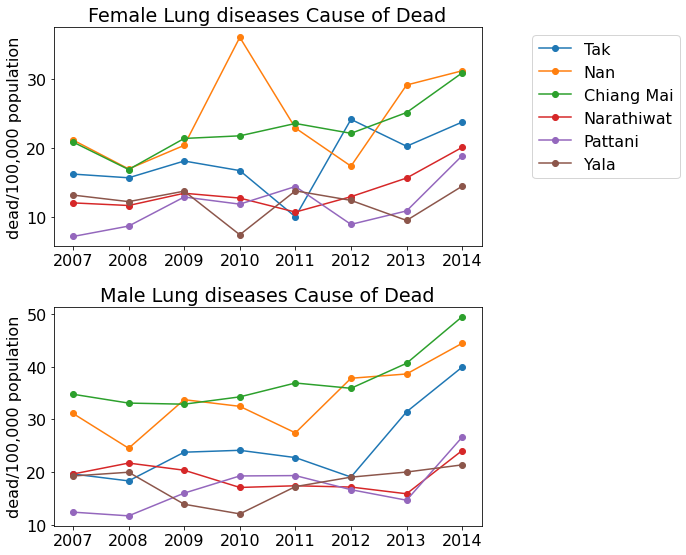

In [581]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

fm_dead = dead_cause[dead_cause['gender']=='Female'].set_index('province').drop('gender', axis=1)
m_dead = dead_cause[dead_cause['gender']=='Male'].set_index('province').drop('gender', axis=1)

years = np.arange(2007, 2015)

for prov in fm_dead.index.unique():
    f = fm_dead.loc[prov,:]
    m = m_dead.loc[prov,:]
    ax[0].plot(years, f.values, label=prov, marker='o')
    ax[1].plot(years, m.values, label=prov, marker='o')
    
    ax[0].set_title('Female Lung diseases Cause of Dead')
    ax[1].set_title('Male Lung diseases Cause of Dead')
    
for a in ax:
    a.set_ylabel('dead/100,000 population')
    
ax[0].legend(bbox_to_anchor=(1.1, 1.0), ncol=1)    
plt.tight_layout()

In [560]:
m

2007      19.2722
2008      19.9854
2009      13.9125
2010      12.0837
2011      17.2601
2012      19.0538
2013      20.0216
2014      21.3828
gender       Male
Name: Yala, dtype: object

# Make Map 

In [1]:
map_folder = '../data/world_maps/'

In [76]:
filename = map_folder + 'THA.gdb'
# select province level
prov_map = gpd.read_file(filename, driver='FileGDB', layer=2)
prov_map['geometry'].shape
# overide old crs and convert
crs = pyproj.CRS('EPSG:4326')
prov_map['geometry'] = prov_map['geometry'].set_crs(crs, allow_override=True)

In [10]:
sub_province_list = prov_map['admin1Name_en']

In [11]:
files = glob(data_folder + 'health_prov/*rates*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in sub_province_list]
use_files = [ file_dict[s] for s in names]

In [68]:
dead_cause = pd.DataFrame()

for use_file, province in zip(use_files, sub_province_list):
    
    pat = pd.read_excel(use_file)
    
    pat = pat.iloc[:, 1:]
     
    # extract year
    years = pat.iloc[3].dropna().to_list() 
    years = [float(str(year).replace('(', '').replace(')','')) for year in years]
    years = [int(year) for year in years]
    if province == 'Samut Prakan':
        years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
    # drop the first few rows 
    pat = pat.iloc[5:, :]
    pat.columns = years + ['cause']
    if province == 'Bueng Kan':
        pat = pat.iloc[:38,:]
        pat = pat.dropna(how='all')
    else:
        pat = pat.dropna()
        
        
    pat['cause'] = [ s.rstrip().lstrip() for s in pat['cause']]
    pat['gender'] = pat['cause'][pat['cause'].isin(['Total','Male','Female'])]
    pat['gender'] = pat['gender'].fillna(method='ffill')
    sub_dead = pat[pat['cause'] =='Pneumonia and other diseases of lung']
    sub_dead['province'] = province
    sub_dead = sub_dead.drop('cause', axis=1)
    
    if len(sub_dead) == 0:
        print(use_file)
    
    dead_cause = pd.concat([dead_cause, sub_dead], ignore_index=True)
    #dead_cause.append(sub_dead)
    
#dead_cause = pd.concat(dead_cause, ignore_index=True)

In [82]:
fm_dead = dead_cause[dead_cause['gender']=='Female'].set_index('province').drop('gender', axis=1)[[2014]]
m_dead = dead_cause[dead_cause['gender']=='Male'].set_index('province').drop('gender', axis=1)[[2014]]

fm_dead.columns = ['female_dead_14']
m_dead.columns = ['male_dead_14']

In [84]:
lung_map = prov_map.merge(fm_dead, left_on ='admin1Name_en', right_index=True, how='left')
lung_map = lung_map.merge(m_dead, left_on ='admin1Name_en', right_index=True, how='left')
lung_map = lung_map.fillna(0)

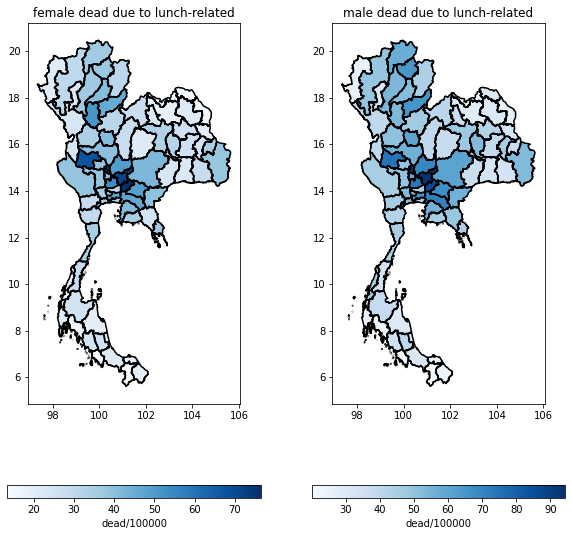

In [85]:
_, ax = plt.subplots(1, 2, figsize=(10,10))
lung_map.plot(column='female_dead_14',
           ax=ax[0],legend=True,
           legend_kwds={'label': "dead/100000",
                       'orientation': "horizontal"},  cmap='Blues')

lung_map.plot(column='male_dead_14',
           ax=ax[1],legend=True,
           legend_kwds={'label': "dead/100000",
                       'orientation': "horizontal"},  cmap='Blues')

lung_map.boundary.plot(ax=ax[0], color='black')
lung_map.boundary.plot(ax=ax[1], color='black')


ax[0].set_title("female dead due to lunch-related")
ax[1].set_title("male dead due to lunch-related")

plt.savefig(report_folder + 'th_lung_province.png')

In [110]:
mean_df = []
for province in sub_province_list:
    
    filename = pm_folder + '_'.join(province.split(' ')) + '.txt'
    if os.path.exists(filename):
        df, _ = read_b_data(filename)
        df = df.set_index('datetime')
        df = add_season(df, start_month='-09-01', end_month='-04-30', next_year=True)
        mean_value = df['PM2.5'].mean()
            
    else:
        mean_value = np.nan
        
    mean_dict = {'province': province,
                'PM2.5': mean_value}
    mean_df.append(mean_dict)
    
mean_df = pd.DataFrame(mean_df)

In [111]:
pm25_map = prov_map.merge(mean_df, left_on ='admin1Name_en', right_on='province', how='left')


Text(0.5, 1.0, 'Average PM2.5 in Winter')

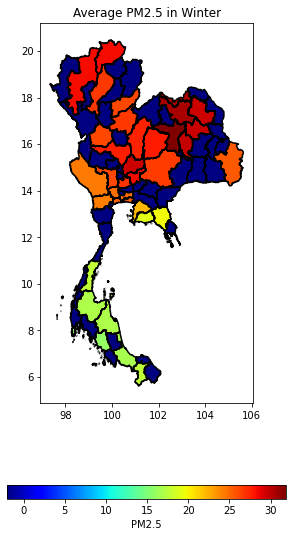

In [112]:
_, ax = plt.subplots(1, 1, figsize=(5,10))
pm25_map.plot(column='PM2.5',
           ax=ax,legend=True,
           legend_kwds={'label': "PM2.5",
                       'orientation': "horizontal"},  cmap='jet',
             missing_kwds={
         "color": "lightgrey",
         "edgecolor": "red",
            "hatch": "///",
           "label": "Missing values"    },)

 
pm25_map.boundary.plot(ax=ax, color='black')


ax.set_title("Average PM2.5 in Winter")

# Correct the rate

## Lung dead rate

In [7]:
map_folder = '../data/world_maps/'

In [60]:
filename = map_folder + 'THA.gdb'
# select province level
prov_map = gpd.read_file(filename, driver='FileGDB', layer=2)
prov_map['geometry'].shape
# overide old crs and convert
crs = pyproj.CRS('EPSG:4326')
prov_map['geometry'] = prov_map['geometry'].set_crs(crs, allow_override=True)
province_list = prov_map['admin1Name_en'].to_list()

In [65]:
# dictionary to conver Thai province name to English 
prov_dict = prov_map[['admin1Name_en', 'admin1Name_th']]
prov_dict.columns = ['province', 'province_th']

region_dict = pd.DataFrame({'province_th': ['ทั่วราชอาณาจักร', 'ภาคกลาง', 'ภาคเหนือ', 'ภาคตะวันออกเฉียงเหนือ', 'ภาคใต้'],
              'province': ['Whole Kingdom', 'Central Region', 'Northern Region', 'Northeastern Region', 'Southern Region']})

prov_dict = pd.concat([prov_dict, region_dict], ignore_index=True)

In [16]:
files = glob(data_folder + 'health_prov/*rates*')

file_dict = {}
for file in files:
    k = '_'.join(file.split('\\')[-1].split('_')[1:-1])
    file_dict[k] = file
    
# look for the files
names = [ '_'.join(s.split(' ')) for s in province_list]
use_files = [ file_dict[s] for s in names]

In [17]:
dead_cause = pd.DataFrame()

for use_file, province in zip(use_files, province_list):
    
    pat = pd.read_excel(use_file)
    
    pat = pat.iloc[:, 1:]
     
    # extract year
    years = pat.iloc[3].dropna().to_list() 
    years = [float(str(year).replace('(', '').replace(')','')) for year in years]
    years = [int(year) for year in years]
    if province == 'Samut Prakan':
        years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
    # drop the first few rows 
    pat = pat.iloc[5:, :]
    pat.columns = years + ['cause']
    if province == 'Bueng Kan':
        pat = pat.iloc[:38,:]
        pat = pat.dropna(how='all')
    else:
        pat = pat.dropna()
        
        
    pat['cause'] = [ s.rstrip().lstrip() for s in pat['cause']]
    pat['gender'] = pat['cause'][pat['cause'].isin(['Total','Male','Female'])]
    pat['gender'] = pat['gender'].fillna(method='ffill')
    sub_dead = pat[pat['cause'] =='Pneumonia and other diseases of lung']
    sub_dead['province'] = province
    sub_dead = sub_dead.drop('cause', axis=1)
    
    if len(sub_dead) == 0:
        print(use_file)
    
    dead_cause = pd.concat([dead_cause, sub_dead], ignore_index=True)
    #dead_cause.append(sub_dead)
    
#dead_cause = pd.concat(dead_cause, ignore_index=True)

In [19]:
dead_cause.to_csv(data_folder + 'process/lung_dead_prov.csv', index=False)

In [53]:
dead_cause.head()

,2007,2008,2009,2010,2011,2012,2013,2014,gender,province
0,11.926543,12.730365,11.887362,16.152001,18.807598,16.359677,27.265729,36.529534,Total,Amnat Charoen
1,14.061959,14.591203,12.396716,17.183053,18.764543,17.134840,29.368576,37.840229,Male,Amnat Charoen
2,9.781067,10.860534,11.375455,15.115444,18.850852,15.581848,25.157771,35.217280,Female,Amnat Charoen
3,24.280813,23.540242,28.439114,23.868945,35.498882,32.045413,44.396368,48.651507,Total,Ang Thong
4,28.506688,30.655368,31.385029,29.949962,35.141665,34.488325,52.121951,58.728959,Male,Ang Thong


## Population

In [22]:
population = pd.read_excel(data_folder + 'data/pop_province_sex_area.xlsx', header=[2])
population.head()

,ภาค,จังหวัด,รายการข้อมูล,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562
0,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,ประชากรรวม,63878267.00,64076033.00,64456695.00,64785909.00,65124716.00,65729098.00,65931550.00,6.618850e+07,6.641398e+07,66558935.00
1,NaN,NaN,ประชากรชาย,31451801.00,31529148.00,31700727.00,31845971.00,31999008.00,32280886.00,32357808.00,3.246491e+07,3.255627e+07,32605100.00
2,NaN,NaN,ประชากรหญิง,32426466.00,32546885.00,32755968.00,32939938.00,33125708.00,33448212.00,33573742.00,3.372360e+07,3.385771e+07,33953835.00
3,NaN,NaN,เนื้อที่ (ตร.กม.),513140.00,513140.00,513140.00,513140.00,513140.00,513140.00,513140.00,5.131395e+05,5.131395e+05,513140.00
4,NaN,NaN,ความหนาแน่น ต่อ ตร.กม.,124.49,124.87,125.61,126.25,126.91,128.09,128.49,1.289900e+02,1.294300e+02,129.71


In [66]:
# population from 2010 - 2019
population = pd.read_excel(data_folder + 'data/pop_province_sex_area.xlsx', header=[2])
population['จังหวัด'] = population['จังหวัด'].fillna(method='ffill')
# select total popoulation
population = population[population['รายการข้อมูล'].isin(['ประชากรรวม','ประชากรชาย','ประชากรหญิง'])]
population = population.set_index(['จังหวัด','รายการข้อมูล'])
population = population.iloc[:, 1:]
cols  = (population.columns - 543).astype(int).to_list()

population = population.reset_index()
population.columns = ['province_th', 'gender_th'] + cols

# replace gender with english
gender_dict = pd.DataFrame({'gender_th': ['ประชากรรวม','ประชากรชาย','ประชากรหญิง'],
'gender':['Total','Male','Female']})
population = population.merge(gender_dict, on='gender_th', how='left')
# replace province name with the Thailand 
population = population.merge(prov_dict, on='province_th', how='left')


In [111]:
# population from 2010 - 2019
pop2 = pd.read_excel(data_folder + 'pop_province/00000_Whole_Kingdom_1.1.1.xls', header=[2])
pop2 = pop2.iloc[:257, 1:].dropna(how='all')

# extract year
years = pop2.iloc[1].dropna().to_list() 
years = [float(str(year).replace('(', '').replace(')','')) for year in years]
years = [int(year) for year in years] 
 
pop2.columns = years + ['province']

pop2 = pop2.iloc[2:,:]

# add gender columns
pop2['gender'] = 'Total'
idxs = pop2[pop2['province']== 'Male'].index
pop2.loc[idxs, 'gender'] = 'Male'
idxs = pop2[pop2['province']== 'Female'].index
pop2.loc[idxs, 'gender'] = 'Female'

# remove gender from the province
idxs = pop2[pop2['province'].isin( ['Male', 'Female'])].index
pop2.loc[idxs,'province'] = np.nan
pop2['province'] = pop2['province'].fillna(method='ffill')

# remove The word province from the province columns
pop2['province'] = pop2['province'].str.replace(' Province', '')
# select data before 2010
pop2 = pop2[np.arange(2006, 2010).tolist() + ['province', 'gender']]

In [114]:
population = population.merge(pop2, on =['province', 'gender'], how='outer')

In [124]:
population.to_csv(data_folder  + 'process/pop_prov.csv', index=False )

In [126]:
population

,province_th,province,gender_th,gender,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,ทั่วราชอาณาจักร,Whole Kingdom,ประชากรรวม,Total,66558935.0,66413979.0,66188503.0,65931550.0,65729098.0,65124716.0,64785909.0,64456695.0,64076033.0,63878267.0,63525062.0,63389730.0,63038247.0,62828706.0
1,ทั่วราชอาณาจักร,Whole Kingdom,ประชากรชาย,Male,32605100.0,32556271.0,32464906.0,32357808.0,32280886.0,31999008.0,31845971.0,31700727.0,31529148.0,31451801.0,31293096.0,31255869.0,31095942.0,31007857.0
2,ทั่วราชอาณาจักร,Whole Kingdom,ประชากรหญิง,Female,33953835.0,33857708.0,33723597.0,33573742.0,33448212.0,33125708.0,32939938.0,32755968.0,32546885.0,32426466.0,32231966.0,32133861.0,31942305.0,31820849.0
3,กรุงเทพมหานคร,Bangkok,ประชากรรวม,Total,5666264.0,5676648.0,5682415.0,5686646.0,5696409.0,5692284.0,5686252.0,5673560.0,5674843.0,5701394.0,5702595.0,5710883.0,5716248.0,5695956.0
4,กรุงเทพมหานคร,Bangkok,ประชากรชาย,Male,2669316.0,2679453.0,2682962.0,2687253.0,2695051.0,2695519.0,2694921.0,2690754.0,2692954.0,2709568.0,2713535.0,2722313.0,2727574.0,2721273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,ยะลา,Yala,ประชากรชาย,Male,266860.0,264928.0,262057.0,259452.0,257124.0,254056.0,251023.0,248437.0,244903.0,241769.0,238215.0,236178.0,234166.0,232827.0
242,ยะลา,Yala,ประชากรหญิง,Female,269470.0,267398.0,265238.0,262827.0,261015.0,257855.0,255115.0,252377.0,248864.0,245611.0,242119.0,239349.0,236525.0,235425.0
243,นราธิวาส,Narathiwat,ประชากรรวม,Total,808020.0,802474.0,796239.0,789681.0,783082.0,774799.0,766145.0,757397.0,747372.0,737162.0,728071.0,719930.0,711517.0,707171.0
244,นราธิวาส,Narathiwat,ประชากรชาย,Male,400017.0,397100.0,393837.0,390832.0,387631.0,383850.0,379462.0,375340.0,370019.0,364898.0,360367.0,356481.0,352404.0,349935.0


## Putting data together

In [125]:
population = pd.read_csv(data_folder  + 'process/pop_prov.csv')  

In [20]:
dead_cause = pd.read_csv(data_folder + 'process/lung_dead_prov.csv')

# Rate Adjustment

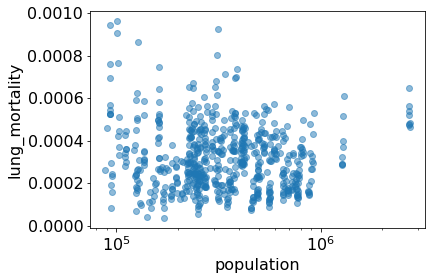

In [448]:
plt.scatter(dead_male_rate['pop'], dead_male_rate['rate'], alpha=0.5)
plt.xlabel('population')
plt.ylabel('lung_mortality')

plt.xscale('log')

In [452]:
dead_male_rate[dead_male_rate['rate'] > 0.0008]

,province,year,dead,pop,rate,count
516,Saraburi,2013,80.486525,311374.0,0.000805,250.614112
519,Sing Buri,2013,96.490883,101384.0,0.000965,97.826316
559,Nakhon Nayok,2014,86.498388,127503.0,0.000865,110.288040
592,Samut Songkhram,2014,94.313335,93316.0,0.000943,88.009431
593,Saraburi,2014,92.530337,313285.0,0.000925,289.883665
596,Sing Buri,2014,90.834592,101181.0,0.000908,91.907349


In [453]:
dead_male_rate[dead_male_rate['province'].str.contains('Samut Sakhon')]

,province,year,dead,pop,rate,count
56,Samut Sakhon,2007,45.037089,228254.0,0.000450,102.798958
132,Samut Sakhon,2008,44.776963,231803.0,0.000448,103.794343
208,Samut Sakhon,2009,45.871756,234714.0,0.000459,107.667434
284,Samut Sakhon,2010,54.166138,237906.0,0.000542,128.864492
360,Samut Sakhon,2011,48.007681,241183.0,0.000480,115.786366
437,Samut Sakhon,2012,49.279897,245830.0,0.000493,121.144772
514,Samut Sakhon,2013,55.947997,251059.0,0.000559,140.462481
591,Samut Sakhon,2014,51.580895,256880.0,0.000516,132.501004


What we are seeing here is the rate for provinces with small population is high. Samut Songkhrams is right next to Samut Sakorn, but the rate are soo difference, this cannot be true. Note that, the rate for Saraburi is probably real because of high enough population.

## Partially pooled

What we want is a model which deferes to the data when there is enough: those province with large populations, but regularizes the values from counties with small populations. What sort of a prior can help us here?

Why not borrow statistical strength from the overall average while not accepting it entirely? This leads naturally to the concept of a hierarchical model: one in which we have a separate poisson for each province, with a separate rate parameter for each province. But we assume that all of these rate parameters  𝜃𝑗  are draws from the same $Gamma(\alpha, \beta) distribution.

Modeling in this way has two advantages: (a) as we shall see, it helps us develop a computational strategy to solve the problem, and (b) it allows estimates of the probabilities of any one of the units (here, one of the experiments) to borrow strength from all the data as a whole through the estimation of the hyperparameters  𝛼  and  𝛽 . In other words, if some of the experiments had lower sample sizes or other outlier like behavior, the procedure helps "regularize" this.

The likelihood is a product of poissons, each with a different rate parameter:

$$\cal L = \prod_{j} Poisson(y_{j}, 5\,\theta_{j}n_{j})$$

The prior is

$$p(\theta_{j}) \sim Gamma(\alpha, \beta)$$

The posterior distribution then simply turns out to be another Gamma!

$$p(\theta_{j} | \{y_j\}) \propto \cal L(\{y_j\} | \{\theta_{j}\}) \times p(\theta_{j}) \propto Gamma(\alpha + y_{j}, \beta + 5\,n_{j})$$

To calculate this postrior one MUST integrate or **marginalize** over all other parameters. Notice that all the poissons separate out.

In [436]:
# prior of the rate 
prior = lambda theta, a,b: gamma.pdf(theta, a, 0., 1./b)
# likelyhood
like1 = lambda yj, thetaj, nj: poisson.pmf(yj, 5.*thetaj*nj)
posterior = lambda thetaj,a,b,yj, nj: gamma.pdf(thetaj, a+yj, 0., 1./(b+5.*nj))


The mean of this posterior distribution is 

$$\frac{\alpha + y_{j}}{\beta + 5\,n_{j}}$$

which can be used to estimate the death rates in all the counties.

In [437]:
meanpost = lambda yj,nj,a,b: (a+yj)/(b + 5*nj)

The posterior predictive turns out to be simple too. Its a negative binomial distribution:

$$p(y^{*} | \{y_{j}\}) = NegBin(\alpha, \frac{\beta}{5\,n_{j}})$$

We can use this somewhat self-referentially on the same counties (or hold some out) to estimate the number of deaths in these counties. 


In [438]:
postpred = lambda y,a,b,nj: nbinom.pmf(y, a, b/(5.*nj))
meanpostpred=lambda nj, a,b: 5.*nj*(a/b)
varpostpred=lambda nj,a,b: meanpostpred(nj,a,b)*(1. +  meanpostpred(nj,a,b)/a)

 We use the mean and the variance of the negative binomial distribution, respectively:

$$ 5\,n_{j}\frac{\alpha}{\beta}$$

and

$$ 5\,n_{j}\frac{\alpha}{\beta} + \left(5\,n_{j}\frac{\alpha}{\beta}\right)^{2}\frac{1}{\alpha}$$

and equate these to the empirically calculated mean and variance of the number of deaths: this fixes $\alpha$ and $\beta$ for us from all the data while the individual Gamma function posterior draws retain information from that counties contribution to the likelihood and thus only allow for partial pooling.

In [456]:
meany=dead_male_rate['count'].mean()
vary=dead_male_rate['count'].var()
meanpop=dead_male_rate['pop'].mean()
meanpopsquared=np.mean(dead_male_rate['pop']**2)

In [458]:
abyb=meany/(5.*meanpop)
est_a = (25.*meanpopsquared*abyb*abyb)/(vary - meany) 
est_b = est_a/abyb

print(est_a, est_b)

1.0477423802222077 16104.121168928204


In [459]:
abyb

6.506051272414384e-05

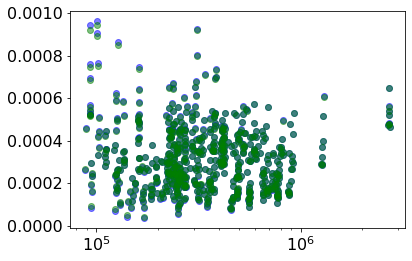

In [469]:
plt.scatter(dead_male_rate['pop'], dead_male_rate['rate'], alpha=0.5, color='blue')


# adjust the rate of the old plot
vals=zip(dead_male_rate['count'], dead_male_rate['pop'])
meanposts=[meanpost(yjay, njay, est_a, est_b) for (yjay, njay) in vals]
plt.scatter(dead_male_rate['pop'], 5*np.array(meanposts), color="green", alpha=0.5)
 
plt.xscale('log')

In [471]:
dead_male_rate['adjusted_rate'] = 5*np.array(meanposts)

In [473]:
dead_male_rate[dead_male_rate['province'].str.contains('Samut Sakhon')]

,province,year,dead,pop,rate,count,adjusted_rate
56,Samut Sakhon,2007,45.037089,228254.0,0.000450,102.798958,0.000449
132,Samut Sakhon,2008,44.776963,231803.0,0.000448,103.794343,0.000446
208,Samut Sakhon,2009,45.871756,234714.0,0.000459,107.667434,0.000457
284,Samut Sakhon,2010,54.166138,237906.0,0.000542,128.864492,0.000539
360,Samut Sakhon,2011,48.007681,241183.0,0.000480,115.786366,0.000478
437,Samut Sakhon,2012,49.279897,245830.0,0.000493,121.144772,0.000491
514,Samut Sakhon,2013,55.947997,251059.0,0.000559,140.462481,0.000557
591,Samut Sakhon,2014,51.580895,256880.0,0.000516,132.501004,0.000513


In [475]:
dead_male_rate[dead_male_rate['province'].str.contains('Samut Songkhram')]

,province,year,dead,pop,rate,count,adjusted_rate
57,Samut Songkhram,2007,54.436581,93526.0,0.000544,50.912357,0.000537
133,Samut Songkhram,2008,52.446243,93331.0,0.000524,48.948603,0.000518
209,Samut Songkhram,2009,69.691641,93204.0,0.000697,64.955397,0.000685
285,Samut Songkhram,2010,52.515942,93405.0,0.000525,49.052516,0.000518
361,Samut Songkhram,2011,56.773143,93302.0,0.000568,52.970478,0.000560
438,Samut Songkhram,2012,76.131246,93217.0,0.000761,70.967264,0.000747
515,Samut Songkhram,2013,52.543536,93295.0,0.000525,49.020492,0.000519
592,Samut Songkhram,2014,94.313335,93316.0,0.000943,88.009431,0.000923


In [479]:
dead_male_new = dead_male_rate.groupby('province').mean() 

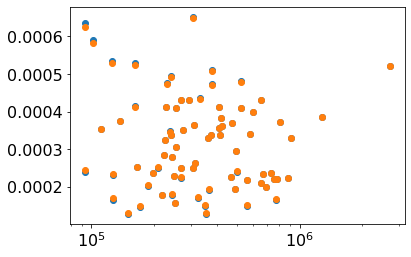

In [484]:
plt.scatter(dead_male_new['pop'], dead_male_new['rate'])
plt.scatter(dead_male_new['pop'], dead_male_new['adjusted_rate'])

plt.xscale('log')

In [477]:
# use province_list to keep the bar plot in the same order
dead_male_short = pd.DataFrame(index=province_list, columns =['lung'])
dead_male_short = dead_male_short.merge(dead_male_new, right_index=True, left_index=True, how='left', suffixes=('_x', ''))
dead_male_short = dead_male_short[['adjusted_rate']]

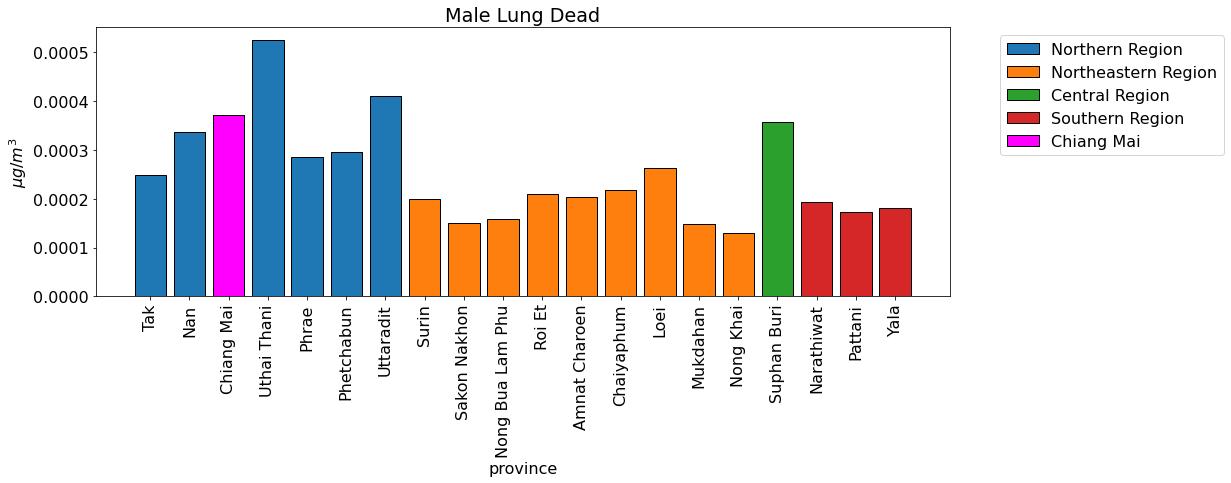

In [478]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))
#ax.bar(pm10_short_list['province'], pm10_short_list['avgPM10'])


for region in region_list:
    # select province
    prov_in_region = provinces[provinces['region'] == region]['province'].to_list()
    # select only province near Chiang Mai
    # use province_list to keep the bar plot in the same order

    prov_in_region = [s for s in province_list if s in prov_in_region]
    df = dead_male_short.loc[prov_in_region]
     
    if len(df) > 0:
        ax.bar(df.index, df['adjusted_rate'], label=region, edgecolor='black')
# highlight Chiang Mai
df = dead_male_short.loc[['Chiang Mai']]
ax.bar(df.index, df['adjusted_rate'], color='magenta', label='Chiang Mai', edgecolor='black')

ax.set_xlabel('province')
ax.set_ylabel('$\mu g/m^3$')
ax.legend(bbox_to_anchor=(1.05, 1.0))
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Male Lung Dead')
plt.tight_layout()

Find the p-value associated with the Z-score where the population mean is 1.75m given a list X containing the heights of the basketball players in Python?

In [2]:
import statsmodels.stats.weightstats as sms 
from scipy.stats import norm 

x = [2.06,2.08,1.88,1.91,
2.06,2.01,1.98,2.13,2.01,2.06,2.01,
2.13,2.11,2.01,2.06,2.01]

s = sms.ztest(x, value=1.75); 
print(s)
print( 2*norm.sf(16.06960894924432) )

(16.069608949244316, 4.1670677724647245e-58)
4.167067772464368e-58


Use scipy's t-test to compare the heights of the Golden State Warriors X with the Cleveland Cavaliers Y i.e. are they significantly different populations?

In [3]:
from scipy import stats

x = [2.06,2.08,1.88,1.91,
2.06,2.01,1.98,2.13,2.01,2.06,2.01,
2.13,2.11,2.01,2.06,2.01]

y = [1.91,1.96,2.06,1.91,
1.96,2.03,2.03,2.01,2.08,2.06,2.03,
2.08,1.88,1.98,2.06,2.11]

print( stats.ttest_ind(x, y, equal_var=True) )
print( stats.ttest_ind(x, y, equal_var=False) )

Ttest_indResult(statistic=0.914952019225675, pvalue=0.36751280326452773)
Ttest_indResult(statistic=0.914952019225675, pvalue=0.36751503743577896)


$ Z = \frac{(p_1 - p_2)}{\sqrt{p(1-p)(\frac{1}{n_1} + \frac{1}{n_2})}} $


$ Z = \frac{(p_1 - p1)}{\sqrt{p(1-p)(\frac{1}{n_1} )}} $

Null hypothesis: population proportion is equal to hypothesized proportion
Alternative hypothesis: population proportion is not equal to hypothesized proportion (two -tailed)

https://sixsigmastudyguide.com/one-and-two-sample-proportion-hypothesis-tests/?fbclid=IwAR2ht6xg8viuFKu_nZ90W_Q2sb9zo4loNJwBJb-XCaaNZaLvZTZfC-m2ekI

# Smoking Rate

In [503]:
folder = '../data/nso_data/smoke/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*')
print(len(files))

16


In [504]:
files

['../data/nso_data/smoke\\clean_2001.csv',
 '../data/nso_data/smoke\\clean_2004.csv',
 '../data/nso_data/smoke\\clean_2007.csv',
 '../data/nso_data/smoke\\clean_2011.csv',
 '../data/nso_data/smoke\\clean_2013.csv',
 '../data/nso_data/smoke\\clean_2014.csv',
 '../data/nso_data/smoke\\clean_2015.csv',
 '../data/nso_data/smoke\\sector_TH_report_sector_05_5_TH_smoker.xlsx',
 '../data/nso_data/smoke\\sector_TH_report_sector_05_6_TH_smoker.xlsx',
 '../data/nso_data/smoke\\จำนวนประชากรอายุ 15 ปีขึ้นไป จำแนกตามหมวดอายุ   พฤติกรรมการสูบบุหรี่   เพศและเขตการปกครอง   ทั่วราชอาณาจักร   พ.ศ. 2544.xls',
 '../data/nso_data/smoke\\ปี 2547 จำนวนประชากรอายุ 11 ปีขึ้นไป จำแนกตามพฤติกรรมการสูบบุหรี่ กลุ่มอายุ และเพศ.xls',
 '../data/nso_data/smoke\\ปี 2550 จำนวนประชากรอายุ 11 ปีขึ้นไป จำแนกตามพฤติกรรมการสูบบุหรี่ กลุ่มอายุ เพศ และเขตการปกครอง ทั่วราชอาณาจักร.xls',
 '../data/nso_data/smoke\\ปี 2554 จำนวนประชากรอายุ 11 ปีขึ้นไป จำแนกตามพฤติกรรมการสูบบุหรี่ กลุ่มอายุ เพศ และเขตการปกครอง ทั่วราชอาณาจักร.xls',


In [377]:
files[8]

'../data/nso_data/smoke\\จำนวนประชากรอายุ 15 ปีขึ้นไป จำแนกตามหมวดอายุ   พฤติกรรมการสูบบุหรี่   เพศและเขตการปกครอง   ทั่วราชอาณาจักร   พ.ศ. 2544.xls'

In [378]:
file = files[8]
print(file)
df = pd.read_excel(file)
df.head(10)

../data/nso_data/smoke\จำนวนประชากรอายุ 15 ปีขึ้นไป จำแนกตามหมวดอายุ   พฤติกรรมการสูบบุหรี่   เพศและเขตการปกครอง   ทั่วราชอาณาจักร   พ.ศ. 2544.xls


,ตารางที่ 2 จำนวนประชากรอายุ 15 ปีขึ้นไป จำแนกตามหมวดอายุ พฤติกรรมการสูบบุหรี่ เพศและเขตการปกครอง ทั่วราชอาณาจักร พ.ศ. 2544,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,เขตการปกครอง:1) ในเขตเทศบาล,จังหวัด:<ทั้งหมด>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,อายุ(ปี),05. 15 - 19 ปี,NaN,06. 20 - 24 ปี,NaN,...,NaN,09. 35 - 39 ปี,NaN,10. 40 - 49 ปี,NaN,11. 50 - 59 ปี,NaN,12. 60 ปีขึ้นไป,NaN,รวม
4,NaN,NaN,NaN,NaN,NaN,เพศ,01. ชาย,02. หญิง,01. ชาย,02. หญิง,...,02. หญิง,01. ชาย,02. หญิง,01. ชาย,02. หญิง,01. ชาย,02. หญิง,01. ชาย,02. หญิง,NaN
5,ภาค จังหวัดและเขตการปกครอง,ภาค,NaN,Re F54 Tt,พฤติกรรมการสูบบุหรี่,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ทั่วราชอาณาจักร,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5781e+07
7,NaN,1) กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.30189e+06
8,NaN,NaN,จำนวนประชากร,NaN,NaN,NaN,325832,353667,382832,424999,...,438978,350653,376971,551440,593927,304099,333928,265124,334285,6.30189e+06
9,NaN,NaN,NaN,01. ปัจจุบันสูบบุหรี่,NaN,NaN,37001.6,NaN,128565,7315.46,...,13349.1,160086,9740.97,237141,14558.3,104666,12269.5,47593.6,8533.37,1.13001e+06


In [337]:
year = 2558 - 543
print(year)

2015


In [147]:
df = pd.read_excel(file)

# set columns
df.columns = ['region', 'age', 'gender'] + df.iloc[5].dropna().to_list()
# remove top rows 
df = df.iloc[7:]
df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
df.iloc[:,2] = df.iloc[:,2].fillna(method='ffill')

df.iloc[:,0] = df.iloc[:,0].str.split('.', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,1] = df.iloc[:,1].str.split('.', expand=True).iloc[:, 1].str.lstrip()
#df.iloc[:,2] = df.iloc[:,2].str.split('.', expand=True).iloc[:, 1].str.lstrip()

df['gender'] = df['gender'].str.replace('ชาย', 'Male')
df['gender'] = df['gender'].str.replace('หญิง', 'Female')

df = df.dropna(axis=1, how='all')

df.head(10)

,region,age,พฤติกรรมการสูบบุหรี่,01) ไม่เคยสูบ,02) ไม่สูบแต่เคยสูบทุกวัน,03) ไม่สูบแต่เคยสูบไม่ทุกวัน,04) สูบทุกวัน,05) สูบแต่ไม่ทุกวัน,01) ไม่เคยสูบ,02) ไม่สูบแต่เคยสูบทุกวัน,03) ไม่สูบแต่เคยสูบไม่ทุกวัน,04) สูบทุกวัน,05) สูบแต่ไม่ทุกวัน,01) ไม่เคยสูบ,02) ไม่สูบแต่เคยสูบทุกวัน,03) ไม่สูบแต่เคยสูบไม่ทุกวัน,04) สูบทุกวัน,05) สูบแต่ไม่ทุกวัน
7,กรุงเทพมหานคร,ชาย,517414,11702.8,4791.34,54050.6,32659.1,1.37657e+06,165571,169972,624050,198951,246360,55053.3,39294.6,35538.1,13234.2,3.54521e+06
8,กรุงเทพมหานคร,หญิง,625805,2560.11,2574.87,4172.62,4430.38,2.61493e+06,21242,4632.81,29048.6,13864.9,484340,2553.71,9142.03,3565.85,NaN,3.82287e+06
9,ภาคกลาง,ชาย,955544,30944.9,27450.2,239575,110254,2.35903e+06,417392,325100,1.6439e+06,438094,459896,245053,132898,214143,19591.5,7.61887e+06
10,ภาคกลาง,หญิง,1.31389e+06,277.04,3429.36,8041.6,4089.26,5.20732e+06,20007.8,30997.1,100306,31121.2,1.27477e+06,19257.1,20307.1,30022.8,1446.98,8065285
11,ภาคเหนือ,ชาย,588266,7741.47,5616.65,163758,38735,1.15139e+06,345575,148002,1.03572e+06,162818,294932,268346,87826.4,243494,26470.9,4.5687e+06
12,ภาคเหนือ,หญิง,754279,1784.93,NaN,18695.8,4912.83,2.85006e+06,50529.7,8967.79,93589.5,24270.3,893385,83915.9,22090.9,58718.8,14394.7,4.87959e+06
13,ภาคตะวันออกเฉียงเหนือ,ชาย,851891,14642.1,12668.8,356571,83282.4,1.3686e+06,450304,198077,2.03166e+06,234211,329908,386992,126840,465903,43326.3,6.95488e+06
14,ภาคตะวันออกเฉียงเหนือ,หญิง,1.2944e+06,953.221,311.051,9139.48,NaN,4.48443e+06,17551.7,9800.35,44089.6,9251.91,1.58511e+06,19217.1,6242.89,3537.96,6221.39,7.49025e+06
15,ภาคใต้,ชาย,380037,15099.1,6469.14,226731,73563.5,710097,188342,100579,1.06061e+06,170456,161842,151023,49977.4,137646,14308.3,3.44678e+06
16,ภาคใต้,หญิง,681722,349.625,929.503,6328.77,197.036,2.22235e+06,15281.9,12873.6,32564,6009.04,606486,12313.4,215.188,9643.94,819.194,3.60809e+06


In [88]:
# drop gender == nan columns because they are total columns 
df = df[~df['gender'].isna()]


# drop younger than 15 because some files does not have this data 
df = df[df['age'] != 'น้อยกว่า 11']
df = df[df['age'] != '11-14']

In [89]:
df['region'].unique()

array(['กรุงเทพมหานคร', 'ภาคกลาง', 'ภาคเหนือ', 'ภาคตะวันออกเฉียงเหนือ',
       'ภาคใต้', None], dtype=object)

In [90]:
# drop region == nan columns because they are total columns 

df = df[~df['region'].isna()]
# clean region name
region_dict = {'กรุงเทพมหานคร': 'Greater Bangkok',
               'ภาคกลาง':'Central Region', 
               'ภาคเหนือ':'Northern Region',
               'ภาคตะวันออกเฉียงเหนือ':'Northeastern Region',
               'ภาคใต้':'Southern Region'}

df['region'] = df['region'].replace(region_dict)

In [93]:
col_dict = {'1. ไม่สูบและไม่เคยสูบ': 'never',
               '2. ไม่สูบ แต่เคยสูบเป็นประจำ':'former frequent', 
                '3. ไม่สูบ แต่เคยสูบนานๆ ครั้ง':'former occasional',
               '4. สูบเป็นประจำ':'frequent', 
                '5. สูบนานๆ ครั้ง':'occasional',
                '6. ไม่ทราบ':'unknown'}
    
df = df.rename(columns=col_dict)

In [96]:
col_dict = {'1.ไม่สูบ และไม่เคยสูบ': 'never',
               '2.ไม่สูบ แต่เคยสูบเป็นประจำ':'former frequent', 
                '3.ไม่สูบ แต่เคยสูบนาน ๆ ครั้ง':'former occasional',
               '4.สูบเป็นประจำ':'frequent', 
                '5.สูบนาน ๆ ครั้ง':'occasional',
                '6. ไม่ทราบ':'unknown'}
    
df = df.rename(columns=col_dict)

In [98]:
df = df.groupby(['region', 'gender'], as_index=False).sum() 
df

,region,gender,never,รวม,former frequent,former occasional,รวม,frequent,occasional,รวม
0,Central Region,Female,2.787458e+07,2.787458e+07,1.217538e+06,560700.1292,1.778238e+06,4.345334e+06,7.889587e+05,5.134292e+06
1,Central Region,Male,3.532014e+06,3.532014e+06,5.650570e+05,252052.3882,8.171093e+05,1.984175e+06,3.571590e+05,2.341334e+06
2,Greater Bangkok,Female,7.513009e+06,7.513009e+06,2.227531e+05,162297.6817,3.850508e+05,7.833599e+05,1.306090e+05,9.139689e+05
3,Greater Bangkok,Male,1.547127e+06,1.547127e+06,2.001662e+05,129986.4039,3.301526e+05,6.997340e+05,1.192875e+05,8.190214e+05
4,Northeastern Region,Female,3.780315e+07,3.780315e+07,1.694772e+06,740581.4237,2.435354e+06,7.501125e+06,1.100115e+06,8.601240e+06
5,Northeastern Region,Male,4.342590e+06,4.342590e+06,8.226978e+05,345256.6432,1.167954e+06,3.628893e+06,5.229452e+05,4.151838e+06
6,Northern Region,Female,2.022279e+07,2.022279e+07,1.628771e+06,586689.0393,2.215460e+06,3.717099e+06,6.365724e+05,4.353672e+06
7,Northern Region,Male,2.529919e+06,2.529919e+06,6.677815e+05,231116.9898,8.988985e+05,1.583111e+06,2.352733e+05,1.818385e+06
8,Southern Region,Female,1.503094e+07,1.503094e+07,5.659334e+05,249696.9589,8.156304e+05,3.279773e+06,4.940312e+05,3.773804e+06
9,Southern Region,Male,1.685373e+06,1.685373e+06,2.627071e+05,112448.7908,3.751559e+05,1.570741e+06,2.312354e+05,1.801976e+06


In [99]:
df = df.drop('รวม', axis=1)
df['year'] = year

In [100]:
df

,region,gender,never,former frequent,former occasional,frequent,occasional,year
0,Central Region,Female,2.787458e+07,1.217538e+06,560700.1292,4.345334e+06,7.889587e+05,2011
1,Central Region,Male,3.532014e+06,5.650570e+05,252052.3882,1.984175e+06,3.571590e+05,2011
2,Greater Bangkok,Female,7.513009e+06,2.227531e+05,162297.6817,7.833599e+05,1.306090e+05,2011
3,Greater Bangkok,Male,1.547127e+06,2.001662e+05,129986.4039,6.997340e+05,1.192875e+05,2011
4,Northeastern Region,Female,3.780315e+07,1.694772e+06,740581.4237,7.501125e+06,1.100115e+06,2011
5,Northeastern Region,Male,4.342590e+06,8.226978e+05,345256.6432,3.628893e+06,5.229452e+05,2011
6,Northern Region,Female,2.022279e+07,1.628771e+06,586689.0393,3.717099e+06,6.365724e+05,2011
7,Northern Region,Male,2.529919e+06,6.677815e+05,231116.9898,1.583111e+06,2.352733e+05,2011
8,Southern Region,Female,1.503094e+07,5.659334e+05,249696.9589,3.279773e+06,4.940312e+05,2011
9,Southern Region,Male,1.685373e+06,2.627071e+05,112448.7908,1.570741e+06,2.312354e+05,2011


In [101]:
df.to_csv(folder + f'clean_{year}.csv' ,index=False)

In [136]:
file = files[3]
print(file)
df = pd.read_excel(file)
df.head(10)

../data/nso_data/smoke\ปี 2554 จำนวนประชากรอายุ 15 ปีขึ้นไป   จำแนกตามหมวดอายุ   พฤติกรรมการสูบบุหรี่   เพศและเขตการปกครอง   ทั่วราชอาณาจักร.xls


,ตารางที่ 2 จำนวนประชากรอายุ 15 ปีขึ้นไป จำแนกตามหมวดอายุ พฤติกรรมการสูบบุหรี่ เพศและเขตการปกครอง ทั่วราชอาณาจักร พ.ศ. 2544,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,เขตการปกครอง:1) ในเขตเทศบาล,จังหวัด:<ทั้งหมด>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,อายุ(ปี),05. 15 - 19 ปี,06. 20 - 24 ปี,07. 25 - 29 ปี,08. 30 - 34 ปี,09. 35 - 39 ปี,10. 40 - 49 ปี,11. 50 - 59 ปี,12. 60 ปีขึ้นไป,รวม
4,NaN,NaN,NaN,NaN,NaN,NaN,จำนวนประชากร,จำนวนประชากร,จำนวนประชากร,จำนวนประชากร,จำนวนประชากร,จำนวนประชากร,จำนวนประชากร,จำนวนประชากร,NaN
5,ภาค จังหวัดและเขตการปกครอง,ภาค,เพศ,Re F54 Tt,พฤติกรรมการสูบบุหรี่,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ทั่วราชอาณาจักร,NaN,NaN,NaN,NaN,NaN,1.80152e+06,1.96152e+06,2.01342e+06,1.9226e+06,1.72895e+06,2.82489e+06,1.72439e+06,1.80373e+06,1.5781e+07
7,NaN,1) กรุงเทพมหานคร,NaN,NaN,NaN,NaN,679499,807832,869163,834970,727623,1.14537e+06,638026,599408,6.30189e+06
8,NaN,NaN,01. ชาย,NaN,NaN,NaN,325832,382832,403663,395992,350653,551440,304099,265124,2.97963e+06
9,NaN,NaN,NaN,01. ปัจจุบันสูบบุหรี่,NaN,NaN,37001.6,128565,171403,173909,160086,237141,104666,47593.6,1.06036e+06


In [137]:
year = 2544 - 543
print(year)

2001


In [138]:
df.columns = df.iloc[3,:].fillna(df.iloc[5,:]).to_list()
df = df.iloc[7:]

In [139]:
df = df.dropna(axis=1, how='all')
col_dict = {'ภาค':'region',
            'เพศ':'gender',
           'รวม': 'total'}
    
df = df.rename(columns=col_dict)

In [140]:
df.iloc[:,0] = df.iloc[:,0].str.split(')', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,1] = df.iloc[:,1].str.split('.', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,2] = df.iloc[:,2].str.split('.', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,3] = df.iloc[:,3].str.split('.', expand=True).iloc[:, 1].str.lstrip()


df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
df.iloc[:,2] = df.iloc[:,3].fillna(method='ffill')

In [142]:
df.head(10)

,region,gender,Re F54 Tt,พฤติกรรมการสูบบุหรี่,05. 15 - 19 ปี,06. 20 - 24 ปี,07. 25 - 29 ปี,08. 30 - 34 ปี,09. 35 - 39 ปี,10. 40 - 49 ปี,11. 50 - 59 ปี,12. 60 ปีขึ้นไป,total
7,กรุงเทพมหานคร,NaN,NaN,NaN,679499,807832,869163,834970,727623,1.14537e+06,638026,599408,6.30189e+06
8,กรุงเทพมหานคร,ชาย,NaN,NaN,325832,382832,403663,395992,350653,551440,304099,265124,2.97963e+06
9,กรุงเทพมหานคร,ชาย,NaN,NaN,37001.6,128565,171403,173909,160086,237141,104666,47593.6,1.06036e+06
10,กรุงเทพมหานคร,ชาย,สูบบุหรี่เป็นประจำ,สูบบุหรี่เป็นประจำ,25196.3,110283,145611,154682,140283,209352,98331.8,45280.7,929020
11,กรุงเทพมหานคร,ชาย,สูบบุหรี่นาน ๆ ครั้ง,สูบบุหรี่นาน ๆ ครั้ง,11805.3,18281.8,25791.3,19226.6,19802.4,27788.7,6333.77,2312.82,131343
12,กรุงเทพมหานคร,ชาย,สูบบุหรี่นาน ๆ ครั้ง,NaN,288830,254268,232261,222083,190567,314300,199433,217530,1.91927e+06
13,กรุงเทพมหานคร,หญิง,สูบบุหรี่นาน ๆ ครั้ง,NaN,353667,424999,465499,438978,376971,593927,333928,334285,3.32225e+06
14,กรุงเทพมหานคร,หญิง,สูบบุหรี่นาน ๆ ครั้ง,NaN,NaN,7315.46,3882.8,13349.1,9740.97,14558.3,12269.5,8533.37,69649.5
15,กรุงเทพมหานคร,หญิง,สูบบุหรี่เป็นประจำ,สูบบุหรี่เป็นประจำ,NaN,6208.01,3882.8,12097.2,8336.05,11974.3,11837,7476.95,61812.2
16,กรุงเทพมหานคร,หญิง,สูบบุหรี่นาน ๆ ครั้ง,สูบบุหรี่นาน ๆ ครั้ง,NaN,1107.45,NaN,1251.93,1404.92,2584.08,432.462,1056.42,7837.26


In [131]:
df.columns

Index(['ภาค', 'เพศ', 'Re F54 Tt', ' พฤติกรรมการสูบบุหรี่', '05. 15 - 19 ปี',
       '06. 20 - 24 ปี', '07. 25 - 29 ปี ', '08. 30 - 34 ปี', '09. 35 - 39 ปี',
       '10. 40 - 49 ปี', '11. 50 - 59 ปี', '12. 60 ปีขึ้นไป', 'รวม'],
      dtype='object')

In [505]:
file = files[-1]
print(file)
df = pd.read_excel(file)
df.head(10)
print(df.shape)

../data/nso_data/smoke\ปี 2558 จำนวนประชากรอายุ 15 ปีขึ้นไป จำแนกตามพฤติกรรมการสูบบุหรี่ เขตการปกครอง ภาค เพศและกลุ่มอายุ.xls
(24, 25)


In [506]:
year = 2558  - 543
print(year)

2015


In [508]:
df.columns = df.iloc[6,:].fillna(df.iloc[7,:]).to_list()
df = df.iloc[8:]

In [509]:
df = df.dropna(axis=1, how='all')
col_dict = {'ภาค':'region',
            'เพศ':'gender',
           'รวม': 'total'}
    
df = df.rename(columns=col_dict)

In [510]:
df.iloc[:,0] = df.iloc[:,0].str.split(')', expand=True).iloc[:, 1].str.lstrip()
df.iloc[:,1] = df.iloc[:,1].str.split(')', expand=True).iloc[:, 1].str.lstrip()
#df.iloc[:,2] = df.iloc[:,2].str.split(')', expand=True).iloc[:, 1].str.lstrip()


df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
#df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
 

In [511]:
region_dict = {'กรุงเทพมหานคร': 'Greater Bangkok',
               'ภาคกลาง':'Central Region', 
               'ภาคเหนือ':'Northern Region',
               'ภาคตะวันออกเฉียงเหนือ':'Northeastern Region',
               'ภาคใต้':'Southern Region'}

df['region'] = df['region'].replace(region_dict)

In [512]:
df['gender'] = df['gender'].str.replace('ชาย', 'Male')
df['gender'] = df['gender'].str.replace('หญิง', 'Female')

In [513]:
df = df[~df['gender'].isna()]

In [517]:
col_dict = {'1. ไม่เคยสูบ': 'never',
               '    2.1 ทุกวัน':'former frequent', 
                '    2.2 ไม่ทุกวัน':'former occasional', '    2.3 ไม่ทราบ':'unknown',
               '    3.1 ทุกวัน':'frequent', 
                '    3.2 ไม่ทุกวัน':'occasional',
                 '4. ไม่ทราบ':'unknown'}
    
df = df.rename(columns=col_dict)

In [477]:
col_dict = {'01. ชาย': 'Male',
               '02. หญิง':'Female'}
    
df = df.rename(columns=col_dict)

In [515]:
df.columns.unique()

Index([           'region',            'gender',      '1. ไม่เคยสูบ',
          '    2.1 ทุกวัน', '    2.2 ไม่ทุกวัน',   '    2.3 ไม่ทราบ',
          '    3.1 ทุกวัน', '    3.2 ไม่ทุกวัน',        '4. ไม่ทราบ',
                       nan],
      dtype='object')

In [518]:
df.head(10)

,region,gender,never,former frequent,former occasional,unknown,frequent,occasional,unknown,never,...,occasional,unknown,never,former frequent,former occasional,unknown,frequent,occasional,unknown,NaN
9,Greater Bangkok,Female,402900,3601.46,18107.2,5128.45,105042,28860,NaN,1.32347e+06,...,134187,9852.41,229173,64834,60398.2,880.269,55386.8,14700,3830.46,3.59394e+06
10,Greater Bangkok,Male,558058,NaN,3757.52,NaN,1338.67,1213.21,NaN,2.63448e+06,...,56147.6,2178.51,547338,688.767,3486.78,NaN,NaN,NaN,NaN,3.88141e+06
12,Central Region,Female,954009,8324.97,45102,6319.82,258056,68337.1,4848.29,2.32324e+06,...,369196,23887.2,426977,276844,177163,2899.51,243748,38896.9,454.853,7.8531e+06
13,Central Region,Male,1.29589e+06,2461.74,747.994,1500.93,3439.63,3914.93,2810.49,5.31564e+06,...,35295.7,23242.9,1.42858e+06,9977.89,16864.1,1720.43,19387.9,1955.5,215.204,8.31623e+06
15,Northern Region,Female,571639,9925.87,16755.1,3636.52,175125,36076,406.072,1.10406e+06,...,123487,2791.54,258714,355043,109816,4613.68,258617,21759.9,339.772,4.57519e+06
16,Northern Region,Male,777529,7656.75,144.804,2159.67,3568.22,2220.81,NaN,2.76868e+06,...,14339.8,175.341,1.03705e+06,57675.9,28110.8,1733.33,43310.8,10335.5,469.526,4.90292e+06
18,Northeastern Region,Female,850293,19214.1,52847.5,5751.13,404672,88719.8,12051,1.20826e+06,...,222258,6533.8,308171,493810,166657,3617.41,489620,32760,338.966,7.14245e+06
19,Northeastern Region,Male,1.3882e+06,11821.2,5135.82,654.758,3443.89,10422.9,129.831,4.40007e+06,...,2803.16,1489.42,1.74605e+06,14199.6,10221.4,465.198,14492.2,2414.23,NaN,7.70601e+06
21,Southern Region,Female,404408,3570,20004,8063.08,214685,49350.4,4243.96,679336,...,148863,2804.54,139122,163510,60561.6,2578.42,167253,19785.7,NaN,3.50643e+06
22,Southern Region,Male,676199,2806.92,1518.34,1780.11,2438.38,1007.51,NaN,2.24468e+06,...,5399.97,3328.38,664408,5764.66,3542.56,73.1531,5289.12,1158.6,462.851,3.68054e+06


In [479]:
df.columns

Index([               'region',                     nan,
                   'Re F54 Tt', ' พฤติกรรมการสูบบุหรี่',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                        'Male',                'Female',
                           nan],
      dtype='object')

In [480]:
df['behavior'] =  df['Re F54 Tt'].fillna('') + df[' พฤติกรรมการสูบบุหรี่'].fillna('')

In [481]:
df = df.drop('Re F54 Tt', axis=1)
df = df.drop(' พฤติกรรมการสูบบุหรี่', axis=1)

In [482]:
df

,region,NaN,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,NaN,behavior
7,Greater Bangkok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.30189e+06,
8,Greater Bangkok,จำนวนประชากร,325832,353667,382832,424999,403663,465499,395992,438978,350653,376971,551440,593927,304099,333928,265124,334285,6.30189e+06,
9,Greater Bangkok,NaN,37001.6,NaN,128565,7315.46,171403,3882.8,173909,13349.1,160086,9740.97,237141,14558.3,104666,12269.5,47593.6,8533.37,1.13001e+06,01. ปัจจุบันสูบบุหรี่
10,Greater Bangkok,NaN,25196.3,NaN,110283,6208.01,145611,3882.8,154682,12097.2,140283,8336.05,209352,11974.3,98331.8,11837,45280.7,7476.95,990832,01. สูบบุหรี่เป็นประจำ
11,Greater Bangkok,NaN,11805.3,NaN,18281.8,1107.45,25791.3,NaN,19226.6,1251.93,19802.4,1404.92,27788.7,2584.08,6333.77,432.462,2312.82,1056.42,139180,02. สูบบุหรี่นาน ๆ ครั้ง
12,Greater Bangkok,NaN,288830,353667,254268,417684,232261,461616,222083,425629,190567,367230,314300,579368,199433,321658,217530,325751,5.17188e+06,02. ไม่สูบบุหรี่
13,Central Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.79374e+06,
14,Central Region,จำนวนประชากร,203245,203519,224300,225717,234550,238757,232058,234500,206965,213614,327473,346278,198392,218647,216851,268875,3.79374e+06,
15,Central Region,NaN,21144.6,838.902,78842.5,2162.87,110033,7713.83,106001,8931.51,97808.8,4665.64,150705,15018.7,82053.1,9945.28,69964.2,9565.25,775394,01. ปัจจุบันสูบบุหรี่
16,Central Region,NaN,17471.9,563.734,65324.1,1579.48,93936.7,6216.86,88462.2,6160.42,86526.4,3756.37,132006,12644.5,71261.2,8278.58,62078.5,8676.59,664944,01. สูบบุหรี่เป็นประจำ


In [483]:
df = df[df['behavior'] != '']
df = df[df['behavior'] != '01. ปัจจุบันสูบบุหรี่']

In [484]:
df = df.dropna(axis=1, how='all')

In [520]:
temp = df.melt(id_vars=['region', 'gender'], value_name='', var_name='behavior')
temp = temp.dropna()

In [521]:
temp['behavior'].unique()

array(['never', 'former frequent', 'former occasional', 'unknown',
       'frequent', 'occasional'], dtype=object)

In [361]:
temp = temp[~temp['behavior'].isna()]

In [487]:
behavior_dict = {'1. ไม่เคยสูบ':'never', '    2.1 ทุกวัน':'former frequent', '    2.2 ไม่ทุกวัน':'former occasional',
       '    2.3 ไม่ทราบ':'unknown', '    3.1 ทุกวัน':'frequent', '    3.2 ไม่ทุกวัน':'occasional',
       '4. ไม่ทราบ':'unknown', 
        'ไม่สูบและไม่เคยสูบ ': 'never', 
                 'ปกติไม่สูบ แต่เคยสูบ ': 'former occasional',
               'ปกติไม่สูบ แต่เคยสูบ เป็นประจำ': 'former frequent', 
                 'ปกติไม่สูบ แต่เคยสูบ นานๆครั้ง': 'former occasional',
               'ปกติสูบ ':'frequent', 'ปกติสูบ เป็นประจำ':'frequent', 'ปกติสูบ นานๆครั้ง': 'occasional',
                '01. สูบบุหรี่เป็นประจำ':'frequent', '02. สูบบุหรี่นาน ๆ ครั้ง':'occasional',
       '02. ไม่สูบบุหรี่':'never', '03. ไม่ทราบ':'unknown'}
temp['behavior'] = temp['behavior'].replace(behavior_dict)

In [488]:
temp.head()

,region,behavior,gender,
0,Greater Bangkok,frequent,Male,25196.3
1,Greater Bangkok,occasional,Male,11805.3
2,Greater Bangkok,never,Male,288830
3,Central Region,frequent,Male,17471.9
4,Central Region,occasional,Male,3672.73


In [523]:
temp = temp.groupby(['region' ,'behavior', 'gender'], as_index=False).sum()

In [524]:
temp

,region,behavior,gender,
0,Central Region,former frequent,Female,6.163397e+05
1,Central Region,former frequent,Male,4.158652e+04
2,Central Region,former occasional,Female,6.224532e+05
3,Central Region,former occasional,Male,5.444452e+04
4,Central Region,frequent,Female,2.336758e+06
5,Central Region,frequent,Male,9.602598e+04
6,Central Region,never,Female,3.704222e+06
7,Central Region,never,Male,8.040108e+06
8,Central Region,occasional,Female,4.764297e+05
9,Central Region,occasional,Male,4.116613e+04


In [525]:
temp = temp.pivot_table(index=['region','gender'], columns='behavior').reset_index()

In [526]:
temp

region  gender                                    \
behavior                              former frequent former occasional   
0              Central Region  Female     616339.6889       622453.2304   
1              Central Region    Male      41586.5199        54444.5180   
2             Greater Bangkok  Female     260938.4006       268850.5359   
3             Greater Bangkok    Male      15906.6824        20308.1158   
4         Northeastern Region  Female     938413.3564       574529.5111   
5         Northeastern Region    Male      60268.3094        37401.5933   
6             Northern Region  Female     659159.2689       349601.0157   
7             Northern Region    Male     105522.6676        54230.3613   
8             Southern Region  Female     322135.7550       197198.5330   
9             Southern Region    Male      24327.8462        15617.1982   

                                                               
behavior      frequent         never   occasional     unknown  
0         2.336758e+06  3.704222e+06  476429.6740  96902.7885  
1         9.602598e+04  8.040108e+06   41166.1280  42902.1536  
2         8.919991e+05  1.955539e+06  177747.2772  38861.2314  
3         4.041865e+04  3.739877e+06   57360.7673   7543.0941  
4         2.878510e+06  2.366721e+06  343737.4778  40537.6522  
5         5.233274e+04  7.534318e+06   15640.2525   6043.6992  
6         1.423963e+06  1.934414e+06  181323.3478  26724.6178  
7         1.270283e+05  4.583260e+06   26896.1184   5983.5629  
8         1.516676e+06  1.222867e+06  217999.0255  29549.7067  
9         3.745877e+04  3.585283e+06    7566.0831  10291.3994

In [527]:
temp.columns[0]

('region', '')

In [528]:
col = [' '.join(col).strip() for col in temp.columns.values]
col

['region',
 'gender',
 'former frequent',
 'former occasional',
 'frequent',
 'never',
 'occasional',
 'unknown']

In [529]:
temp.columns = col

In [531]:
temp['year'] = year

In [544]:
temp['gender'] = temp['gender'].str.replace('Female','male')
temp['gender'] = temp['gender'].str.replace('Male','Female')
temp['gender'] = temp['gender'].str.replace('male','Male')

In [545]:
temp

,region,gender,former frequent,former occasional,frequent,never,occasional,unknown,year
0,Central Region,Male,616339.6889,622453.2304,2.336758e+06,3.704222e+06,476429.6740,96902.7885,2015
1,Central Region,FeMale,41586.5199,54444.5180,9.602598e+04,8.040108e+06,41166.1280,42902.1536,2015
2,Greater Bangkok,Male,260938.4006,268850.5359,8.919991e+05,1.955539e+06,177747.2772,38861.2314,2015
3,Greater Bangkok,FeMale,15906.6824,20308.1158,4.041865e+04,3.739877e+06,57360.7673,7543.0941,2015
4,Northeastern Region,Male,938413.3564,574529.5111,2.878510e+06,2.366721e+06,343737.4778,40537.6522,2015
5,Northeastern Region,FeMale,60268.3094,37401.5933,5.233274e+04,7.534318e+06,15640.2525,6043.6992,2015
6,Northern Region,Male,659159.2689,349601.0157,1.423963e+06,1.934414e+06,181323.3478,26724.6178,2015
7,Northern Region,FeMale,105522.6676,54230.3613,1.270283e+05,4.583260e+06,26896.1184,5983.5629,2015
8,Southern Region,Male,322135.7550,197198.5330,1.516676e+06,1.222867e+06,217999.0255,29549.7067,2015
9,Southern Region,FeMale,24327.8462,15617.1982,3.745877e+04,3.585283e+06,7566.0831,10291.3994,2015


In [547]:
temp.to_csv(folder + f'clean_{year}.csv' ,index=False)

In [552]:
files = glob(folder + 'clean*.csv')
files

['../data/nso_data/smoke\\clean_2001.csv',
 '../data/nso_data/smoke\\clean_2004.csv',
 '../data/nso_data/smoke\\clean_2007.csv',
 '../data/nso_data/smoke\\clean_2011.csv',
 '../data/nso_data/smoke\\clean_2013.csv',
 '../data/nso_data/smoke\\clean_2014.csv',
 '../data/nso_data/smoke\\clean_2015.csv']

In [553]:
df_all  = [ ]
for file in files:
    df = pd.read_csv(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [554]:
df_all.to_csv(to_folder + 'smoke.csv', index=False)

# Cause Of Dead Data

In [556]:
mdataset = MapDataset('Thailand')
mdataset.load_()

In [558]:
files = glob(mdataset.health_folder + 'Cause of Death/*')

In [565]:
df_all  = [ ]
for file in files:
    df = pd.read_excel(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [568]:
df_all.head()

,year,รหัสจังหวัด,ชื่อจังหวัด,รหัสเพศ,gender,cause_of_dead,number
0,2552,0,NaN,1,ชาย,โลหิตเป็นพิษ,1
1,2552,0,NaN,1,ชาย,โรคมะเร็งลำไส้ใหญ่และทวารหนัก,1
2,2552,0,NaN,1,ชาย,โรคมะเร็งตับ,2
3,2552,0,NaN,1,ชาย,โรคมะเร็งหลอดลมและปอด,1
4,2552,0,NaN,1,ชาย,มะเร็งอื่น ๆ,1


In [563]:
df_all.columns

Index(['ปี', 'รหัสจังหวัด', 'ชื่อจังหวัด', 'รหัสเพศ', 'ชื่อเพศ',
       'สาเหตุการตาย', 'จำนวน'],
      dtype='object')

In [567]:
df_all.columns = ['year', 'รหัสจังหวัด', 'ชื่อจังหวัด', 'รหัสเพศ', 'gender',
       'cause_of_dead', 'number']

In [569]:
df_all['gender'] = df_all['gender'].str.replace('ชาย', 'Male')
df_all['gender'] = df_all['gender'].str.replace('หญิง', 'Female')

In [572]:
df_all = df_all[~df_all['ชื่อจังหวัด'].isna()]
df_all = df_all.drop('รหัสเพศ', axis=1)

In [573]:
df_all

,year,รหัสจังหวัด,ชื่อจังหวัด,gender,cause_of_dead,number
20,2552,10,กรุงเทพมหานคร,Male,อาการท้องร่วง กระเพาะและลำไส้อักเสบจากการติดเชื้อ,22
21,2552,10,กรุงเทพมหานคร,Male,วัณโรคทางเดินหายใจ,261
22,2552,10,กรุงเทพมหานคร,Male,วัณโรคอื่น ๆ,20
23,2552,10,กรุงเทพมหานคร,Male,บาดทะยัก,2
24,2552,10,กรุงเทพมหานคร,Male,โลหิตเป็นพิษ,1495
...,...,...,...,...,...,...
10256,2562,96,นราธิวาส,Female,การพลัดตก หกล้ม,9
10257,2562,96,นราธิวาส,Female,อุบัติเหตุการตกน้ำจมน้ำ,6
10258,2562,96,นราธิวาส,Female,ฆ่าตัวตาย,1
10259,2562,96,นราธิวาส,Female,ถูกทำร้าย,2


In [577]:
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [579]:
df_all = df_all.merge(prov_dict, left_on='ชื่อจังหวัด', right_on='admin1Name_th', how='left')

In [581]:
df_all = df_all.drop('ชื่อจังหวัด', axis=1)

In [585]:
df_all['year'] -=  543 

In [582]:
df_all['cause_of_dead'].unique()

array(['อาการท้องร่วง กระเพาะและลำไส้อักเสบจากการติดเชื้อ',
       'วัณโรคทางเดินหายใจ', 'วัณโรคอื่น ๆ', 'บาดทะยัก', 'โลหิตเป็นพิษ',
       'โรคพิษสุนัขบ้า', 'โรคไข้เลือดออก', 'โรคไวรัสตับอักเสบ',
       'การติดเชื้อเอชไอวี/เอดส์', 'มาลาเรีย',
       'โรคติดเชื้อและปรสิตอื่น ๆ', 'โรคมะเร็งปากและลำคอ',
       'โรคมะเร็งหลอดอาหาร', 'โรคมะเร็งกระเพาะอาหาร',
       'โรคมะเร็งลำไส้ใหญ่และทวารหนัก', 'โรคมะเร็งตับ',
       'โรคมะเร็งตับอ่อน', 'โรคมะเร็งกล่องเสียง', 'โรคมะเร็งหลอดลมและปอด',
       'โรคมะเร็งเต้านม', 'โรคมะเร็งต่อมลูกหมาก',
       'โรคมะเร็งกระเพาะปัสสาวะ', 'โรคมะเร็งในระบบประสาทส่วนกลาง',
       'มะเร็งต่อมน้ำเหลืองไม่ใช่ฮอดกินส์', 'โรคมะเร็งเม็ดเลือดขาว',
       'มะเร็งอื่น ๆ', 'เนื้องอก', 'โลหิตจาง',
       'โรคเลือดและความผิดปกติของภูมิคุ้มกันอื่น ๆ', 'โรคเบาหวาน',
       'ภาวะทุพโภชนาการ', 'โรคต่อมไร้ท่อ โภชนาการและเมตะบอสลิซึมอื่น ๆ',
       'ความผิดปกติทางจิตเนื่องจากการใช้วัตถุออกฤทธิ์ต่อจิตประสาท',
       'โรคทางจิตเวชและความผิดปกติของพฤติกรรมอื่น ๆ',
       'เยื้อหุ้ม

In [586]:
df_all.columns

Index(['year', 'รหัสจังหวัด', 'gender', 'cause_of_dead', 'number',
       'admin1Name_th', 'province'],
      dtype='object')

In [587]:
df_all = df_all.drop('รหัสจังหวัด', axis=1)

In [588]:
df_all.to_csv(to_folder + 'cause_of_dead.csv', index=False)

# In Patient 

In [2]:
folder = '../data/nso_data/In-Out Patient/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*_In-patient*.xls*')

files = [s for s in files if 'No-Gender' not in s]
files

['../data/nso_data/In-Out Patient\\2550_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2551_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2552_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2553_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2554_In-patient.xlsx',
 '../data/nso_data/In-Out Patient\\2555_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2556_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2557_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2558_In-patient.xls',
 '../data/nso_data/In-Out Patient\\2559_In-patient_Province.xls',
 '../data/nso_data/In-Out Patient\\2560_In-patient_Province.xls',
 '../data/nso_data/In-Out Patient\\2561_In-patient_Province.xlsx',
 '../data/nso_data/In-Out Patient\\2562_In-patient_Province.xlsx']

In [170]:
file = files[9]
print(file)
xl = pd.ExcelFile(file)
print(xl.sheet_names)
sheet_name = 'All Diagnosis'
df = pd.read_excel(file, sheet_name=sheet_name)
print(df.shape)
df.head(10)

../data/nso_data/In-Out Patient\2559_In-patient_Province.xls
['All Diagnosis', 'Principal Diagnosis']
(905, 159)


,"จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 คน รวมทุกการวินิจฉัยโรค จำแนกตามสาเหตุการป่วย 298 กลุ่มโรค เพศ รายจังหวัด ปี พ.ศ. 2559",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158
0,(ฐานข้อมูลผู้ปวยในรายบุคคล หลักประกันสุขภาพถ้ว...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,รหัส\nกลุ่มโรค,สาเหตุการป่วย (โรค/กลุ่มโรค),เพศ,ทั้งประเทศ,NaN,กระบี่,NaN,กรุงเทพมหานคร,NaN,กาญจนบุรี,...,อำนาจเจริญ,NaN,อุดรธานี,NaN,อุตรดิตถ์,NaN,อุทัยธานี,NaN,อุบลราชธานี,NaN
3,NaN,NaN,NaN,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,...,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา
4,NaN,รวมทุกกลุ่มโรค,รวม,19740850,30364.2,130568,28229,1816257,32439.7,244989,...,110928,29503.1,452035,28757.6,184101,40198.8,119145,36088.4,612425,33055.5
5,NaN,NaN,ชาย,9356225,29334.9,57780,25132.8,882933,33443,112810,...,51466,27387.6,215979,27607.7,90321,40147.5,52086,32118.7,295182,31784.9
6,NaN,NaN,หญิง,10384625,31355.5,72788,31288.8,933324,31544.5,132179,...,59462,31617,236056,29896.8,93780,40248.4,67059,39920.6,317243,34332.4
7,001,Cholera (A00)\nอหิวาตกโรค,รวม,142,0.22,0,0,17,0.3036,1,...,2,0.5319,5,0.3181,0,0,1,0.3029,5,0.2699
8,NaN,NaN,ชาย,81,0.25,0,0,8,0.303,1,...,1,0.5321,4,0.5113,0,0,1,0.6166,5,0.5384
9,NaN,NaN,หญิง,61,0.18,0,0,9,0.3042,0,...,1,0.5317,1,0.1267,0,0,0,0,0,0


In [171]:
year = 2559  - 543
print(year)

2016


In [172]:
df = pd.read_excel(file,  sheet_name=sheet_name)

col_list = [2, 3]
#col_list = [0, 1]
index_list = [0, 1, 2]

# fill the missing in the first col
df.iloc[col_list[0],:] = df.iloc[col_list[0],:].fillna(method='ffill' )
df.iloc[:,index_list[0]] = df.iloc[:,index_list[0]].fillna(method='ffill' )
df.iloc[:,index_list[1]] = df.iloc[:,index_list[1]].fillna(method='ffill' )

# remove unuse rows and columns
df = df.iloc[col_list[0]:, index_list[0]:]

In [173]:
df.head(10)

,"จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 คน รวมทุกการวินิจฉัยโรค จำแนกตามสาเหตุการป่วย 298 กลุ่มโรค เพศ รายจังหวัด ปี พ.ศ. 2559",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158
2,รหัส\nกลุ่มโรค,สาเหตุการป่วย (โรค/กลุ่มโรค),เพศ,ทั้งประเทศ,ทั้งประเทศ,กระบี่,กระบี่,กรุงเทพมหานคร,กรุงเทพมหานคร,กาญจนบุรี,...,อำนาจเจริญ,อำนาจเจริญ,อุดรธานี,อุดรธานี,อุตรดิตถ์,อุตรดิตถ์,อุทัยธานี,อุทัยธานี,อุบลราชธานี,อุบลราชธานี
3,รหัส\nกลุ่มโรค,สาเหตุการป่วย (โรค/กลุ่มโรค),NaN,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,...,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา
4,รหัส\nกลุ่มโรค,รวมทุกกลุ่มโรค,รวม,19740850,30364.2,130568,28229,1816257,32439.7,244989,...,110928,29503.1,452035,28757.6,184101,40198.8,119145,36088.4,612425,33055.5
5,รหัส\nกลุ่มโรค,รวมทุกกลุ่มโรค,ชาย,9356225,29334.9,57780,25132.8,882933,33443,112810,...,51466,27387.6,215979,27607.7,90321,40147.5,52086,32118.7,295182,31784.9
6,รหัส\nกลุ่มโรค,รวมทุกกลุ่มโรค,หญิง,10384625,31355.5,72788,31288.8,933324,31544.5,132179,...,59462,31617,236056,29896.8,93780,40248.4,67059,39920.6,317243,34332.4
7,001,Cholera (A00)\nอหิวาตกโรค,รวม,142,0.22,0,0,17,0.3036,1,...,2,0.5319,5,0.3181,0,0,1,0.3029,5,0.2699
8,001,Cholera (A00)\nอหิวาตกโรค,ชาย,81,0.25,0,0,8,0.303,1,...,1,0.5321,4,0.5113,0,0,1,0.6166,5,0.5384
9,001,Cholera (A00)\nอหิวาตกโรค,หญิง,61,0.18,0,0,9,0.3042,0,...,1,0.5317,1,0.1267,0,0,0,0,0,0
10,002,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...,รวม,4169,6.41,33,7.1346,29,0.518,10,...,8,2.1277,47,2.99,9,1.9652,6,1.8174,38,2.051
11,002,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...,ชาย,2199,6.89,21,9.1344,18,0.6818,10,...,6,3.1929,24,3.0678,6,2.667,3,1.8499,25,2.692


In [174]:
# set multi index 
df = df.set_index([df.columns[0], df.columns[1], df.columns[2]])
df = df.dropna(how='all')

In [175]:
df.head(10)

Unnamed: 3  \
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                                         Unnamed: 2               
รหัส\nกลุ่มโรค                                     สาเหตุการป่วย (โรค/กลุ่มโรค)                       เพศ         ทั้งประเทศ   
                                                                                                      NaN              จำนวน   
                                                   รวมทุกกลุ่มโรค                                     รวม           19740850   
                                                                                                      ชาย            9356225   
                                                                                                      หญิง          10384625   
001                                                Cholera (A00)\nอหิวาตกโรค                          รวม                142   
                                                                                                      ชาย                 81   
                                                                                                      หญิง                61   
002                                                Typhoid and paratyphoid fever (A01)\nไข้รากสาดน... รวม               4169   
                                                                                                      ชาย               2199   

                                                                                                                  Unnamed: 4  \
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                                         Unnamed: 2               
รหัส\nกลุ่มโรค                                     สาเหตุการป่วย (โรค/กลุ่มโรค)                       เพศ         ทั้งประเทศ   
                                                                                                      NaN              อัตรา   
                                                   รวมทุกกลุ่มโรค                                     รวม            30364.2   
                                                                                                      ชาย            29334.9   
                                                                                                      หญิง           31355.5   
001                                                Cholera (A00)\nอหิวาตกโรค                          รวม               0.22   
                                                                                                      ชาย               0.25   
                                                                                                      หญิง              0.18   
002                                                Typhoid and paratyphoid fever (A01)\nไข้รากสาดน... รวม               6.41   
                                                                                                      ชาย               6.89   

                                                                                                                 Unnamed: 5  \
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                                         Unnamed: 2              
รหัส\nกลุ่มโรค                                     สาเหตุการป่วย (โรค/กลุ่มโรค)                       เพศ            กระบี่   
                                                                                                      NaN             จำนวน   
                                                   รวมทุกกลุ่มโรค                                     รวม            130568   
                                                                                                      ชาย             57780   
                                                                                                      หญิง            72788   
001                                                Cholera (A00)\nอหิวาตกโรค                          รวม                 0   
                        

In [176]:
# set columns 
arr = [ ['Whole Kingdom', 'Whole Kingdom'] + df.iloc[0,2:].to_list(),   df.iloc[1, :].to_list()]
tuples = list(zip(*arr))
cols = pd.MultiIndex.from_tuples(tuples, names=["prov_th", "number_type"])
df.columns = cols

df = df.iloc[2:,:]

In [177]:
# drop empty columns
df = df.dropna(axis=1, how='all')

In [178]:
df.head()

prov_th                                                                                 Whole Kingdom  \
number_type                                                                                     จำนวน   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                Unnamed: 2                 
รหัส\nกลุ่มโรค                                     รวมทุกกลุ่มโรค            รวม             19740850   
                                                                             ชาย              9356225   
                                                                             หญิง            10384625   
001                                                Cholera (A00)\nอหิวาตกโรค รวม                  142   
                                                                             ชาย                   81   

prov_th                                                                                           \
number_type                                                                                อัตรา   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                Unnamed: 2            
รหัส\nกลุ่มโรค                                     รวมทุกกลุ่มโรค            รวม         30364.2   
                                                                             ชาย         29334.9   
                                                                             หญิง        31355.5   
001                                                Cholera (A00)\nอหิวาตกโรค รวม            0.22   
                                                                             ชาย            0.25   

prov_th                                                                                  กระบี่  \
number_type                                                                               จำนวน   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                Unnamed: 2           
รหัส\nกลุ่มโรค                                     รวมทุกกลุ่มโรค            รวม         130568   
                                                                             ชาย          57780   
                                                                             หญิง         72788   
001                                                Cholera (A00)\nอหิวาตกโรค รวม              0   
                                                                             ชาย              0   

prov_th                                                                                           \
number_type                                                                                อัตรา   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                Unnamed: 2            
รหัส\nกลุ่มโรค                                     รวมทุกกลุ่มโรค            รวม           28229   
                                                                             ชาย         25132.8   
                                                                             หญิง        31288.8   
001                                                Cholera (A00)\nอหิวาตกโรค รวม               0   
                                                                             ชาย               0   

prov_th                                                                                 กรุงเทพมหานคร  \
number_type                                                                                     จำนวน   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                Unnamed: 2                 
รหัส\nกลุ่มโรค                                     รวมทุกกลุ่มโรค            รวม              1816257   
                                                                             ชาย               882933   
                                                                             หญิง              933324   
001                                                Cholera (A00)\nอหิวาตกโรค รวม                   17   
                             

In [179]:
df.iloc[3:,:].head()

prov_th                                                                                                          Whole Kingdom  \
number_type                                                                                                              จำนวน   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                                         Unnamed: 2                 
001                                                Cholera (A00)\nอหิวาตกโรค                          รวม                  142   
                                                                                                      ชาย                   81   
                                                                                                      หญิง                  61   
002                                                Typhoid and paratyphoid fever (A01)\nไข้รากสาดน... รวม                 4169   
                                                                                                      ชาย                 2199   

prov_th                                                                                                                 \
number_type                                                                                                      อัตรา   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                                         Unnamed: 2         
001                                                Cholera (A00)\nอหิวาตกโรค                          รวม         0.22   
                                                                                                      ชาย         0.25   
                                                                                                      หญิง        0.18   
002                                                Typhoid and paratyphoid fever (A01)\nไข้รากสาดน... รวม         6.41   
                                                                                                      ชาย         6.89   

prov_th                                                                                                          กระบี่  \
number_type                                                                                                       จำนวน   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                                         Unnamed: 2          
001                                                Cholera (A00)\nอหิวาตกโรค                          รวม             0   
                                                                                                      ชาย             0   
                                                                                                      หญิง            0   
002                                                Typhoid and paratyphoid fever (A01)\nไข้รากสาดน... รวม            33   
                                                                                                      ชาย            21   

prov_th                                                                                                                   \
number_type                                                                                                        อัตรา   
จำนวนผู้ป่วยใน กับอัตราป่วยต่อประชากร 100,000 ค... Unnamed: 1                                         Unnamed: 2           
001                                                Cholera (A00)\nอหิวาตกโรค                          รวม              0   
                                                                                                      ชาย              0   
                                                                                                      หญิง             0   
002                                                Typhoid and paratyphoid fever (A01)\nไข้รากสาดน... รวม         7.1346   
                                                                                                      ชาย         9.1344   

prov

In [180]:
df = df.iloc[3:,:]

df = df.melt(ignore_index=False, value_name='number')

df = df.reset_index()
# change columns name 
cols = df.columns.to_list()
cols[0] = 'code'
cols[1] = 'disease'
cols[2] = 'gender'
df.columns = cols

In [181]:
num_type_dict = {'จำนวน':'number', 'อัตรา': 'rate'}
df['number_type'] = df['number_type'].replace(num_type_dict)

gender_dict = {'รวม':'total', 
              'หญิง':'Female',
              'ชาย': 'Male'}

df['gender'] = df['gender'].replace(gender_dict) 

In [182]:
# change the rate 
idxs = df[df['number_type'] == 'rate'].index
df.loc[idxs, 'number'] /= 100000

In [183]:
df['year'] = year

In [184]:
df.head(10)

,code,disease,gender,prov_th,number_type,number,year
0,001,Cholera (A00)\nอหิวาตกโรค,total,Whole Kingdom,number,142,2016
1,001,Cholera (A00)\nอหิวาตกโรค,Male,Whole Kingdom,number,81,2016
2,001,Cholera (A00)\nอหิวาตกโรค,Female,Whole Kingdom,number,61,2016
3,002,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...,total,Whole Kingdom,number,4169,2016
4,002,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...,Male,Whole Kingdom,number,2199,2016
5,002,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...,Female,Whole Kingdom,number,1970,2016
6,003,Shigellosis (A03)\nโรคบิดจากเชื้อซิเกลลา,total,Whole Kingdom,number,181,2016
7,003,Shigellosis (A03)\nโรคบิดจากเชื้อซิเกลลา,Male,Whole Kingdom,number,90,2016
8,003,Shigellosis (A03)\nโรคบิดจากเชื้อซิเกลลา,Female,Whole Kingdom,number,91,2016
9,004,Amoebiasis (A06)\nโรคบิดมีตัว,total,Whole Kingdom,number,3730,2016


In [185]:
df.to_csv(folder + f'in_patient_{year}.csv', index=False)

Merge all files together

In [186]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [187]:
files = glob(folder + 'in_patient_*.csv' )
df_all = []

for file in files:
    df = pd.read_csv(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [188]:
# add english province names
df_all = df_all.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df_all = df_all.drop('admin1Name_th', axis=1)

In [189]:
# fill missing
df_all['province'] = df_all['province'].fillna(df_all['prov_th'])

In [190]:
df_all['province'].unique()

array(['Whole Kingdom', 'Krabi', 'Bangkok', 'Kanchanaburi', 'Kalasin',
       'Kamphaeng Phet', 'Khon Kaen', 'Chanthaburi', 'Chachoengsao',
       'Chon Buri', 'Chai Nat', 'Chaiyaphum', 'Chumphon', 'Chiang Rai',
       'Chiang Mai', 'Trang', 'Trat', 'Tak', 'Nakhon Nayok',
       'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima',
       'Nakhon Si Thammarat', 'Nakhon Sawan', 'Nonthaburi', 'Narathiwat',
       'Nan', 'Buri Ram', 'Pathum Thani', 'Prachuap Khiri Khan',
       'Prachin Buri', 'Pattani', 'Phra Nakhon Si Ayutthaya', 'Phayao',
       'Phangnga', 'Phatthalung', 'Phichit', 'Phitsanulok', 'Phetchaburi',
       'Phetchabun', 'Phrae', 'Phuket', 'Maha Sarakham', 'Mukdahan',
       'Mae Hong Son', 'Yasothon', 'Yala', 'Roi Et', 'Ranong', 'Rayong',
       'Ratchaburi', 'Lop Buri', 'Lampang', 'Lamphun', 'Loei',
       'Si Sa Ket', 'Sakon Nakhon', 'Songkhla', 'Satun', 'Samut Prakan',
       'Samut Songkhram', 'Samut Sakhon', 'Sa Kaeo', 'Saraburi',
       'Sing Buri', 'Sukhothai', 'Su

In [191]:
df_all['province'] = df_all['province'].str.replace('กรุงเทพฯ', 'Bangkok')

In [192]:
df_all['province'].unique()

array(['Whole Kingdom', 'Krabi', 'Bangkok', 'Kanchanaburi', 'Kalasin',
       'Kamphaeng Phet', 'Khon Kaen', 'Chanthaburi', 'Chachoengsao',
       'Chon Buri', 'Chai Nat', 'Chaiyaphum', 'Chumphon', 'Chiang Rai',
       'Chiang Mai', 'Trang', 'Trat', 'Tak', 'Nakhon Nayok',
       'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima',
       'Nakhon Si Thammarat', 'Nakhon Sawan', 'Nonthaburi', 'Narathiwat',
       'Nan', 'Buri Ram', 'Pathum Thani', 'Prachuap Khiri Khan',
       'Prachin Buri', 'Pattani', 'Phra Nakhon Si Ayutthaya', 'Phayao',
       'Phangnga', 'Phatthalung', 'Phichit', 'Phitsanulok', 'Phetchaburi',
       'Phetchabun', 'Phrae', 'Phuket', 'Maha Sarakham', 'Mukdahan',
       'Mae Hong Son', 'Yasothon', 'Yala', 'Roi Et', 'Ranong', 'Rayong',
       'Ratchaburi', 'Lop Buri', 'Lampang', 'Lamphun', 'Loei',
       'Si Sa Ket', 'Sakon Nakhon', 'Songkhla', 'Satun', 'Samut Prakan',
       'Samut Songkhram', 'Samut Sakhon', 'Sa Kaeo', 'Saraburi',
       'Sing Buri', 'Sukhothai', 'Su

In [193]:
df_all.to_csv(to_folder + 'in_patient_2007_2019.csv', index=False)

Fix disease name 

In [194]:
df_all.head()

,code,disease,gender,prov_th,number_type,number,year,province
0,1,Cholera (A00)\nอหิวาตกโรค,total,Whole Kingdom,number,564.0,2007,Whole Kingdom
1,1,Cholera (A00)\nอหิวาตกโรค,Male,Whole Kingdom,number,274.0,2007,Whole Kingdom
2,1,Cholera (A00)\nอหิวาตกโรค,Female,Whole Kingdom,number,290.0,2007,Whole Kingdom
3,2,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...,total,Whole Kingdom,number,7859.0,2007,Whole Kingdom
4,2,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...,Male,Whole Kingdom,number,4104.0,2007,Whole Kingdom


In [195]:
diease_df = df_all[['code', 'disease']]
diease_df = diease_df.drop_duplicates()
print(diease_df.shape)
print(diease_df['code'].unique().shape)

(371, 2)
(298,)


In [196]:
duplicate_code = diease_df['code'].value_counts()[diease_df['code'].value_counts() > 1].index
print(duplicate_code)

Int64Index([127, 175,  92, 229, 168,  44,  96,  98, 163,  99, 160, 101, 242,
            102, 244,  34,  33, 248, 249, 250, 157, 173, 222, 253, 220, 193,
            194,  76, 196, 198,  72,  71,  70,  69,  68, 186, 185, 184,  62,
             85,  86,  58,  57, 218, 103, 245, 116, 122, 274, 275, 277, 278,
            117, 281, 121, 286, 270, 123, 288, 289, 291, 292,   5, 133, 271,
            192,  25,  17,  28, 297, 113, 266, 260],
           dtype='int64')


In [197]:
diease_df[diease_df['code'].isin(duplicate_code)].sort_values('code')

,code,disease
12,5,Diarrhoea and gastroenteritis of presumed infe...
413040,5,Diarrhoea and gastroenteritis of presumed infe...
48,17,Septicemia (A40-A41)\nโลหิตเป็นพิษ
1666464,17,Septicaemia (A40-A41)\nโลหิตเป็นพิษ
72,25,Relapsing fever (A68)\nโรคไข้กลับซ้ำ
...,...,...
870,291,Asymptomatic human immunodeficiency virus (HIV...
1667289,292,Other persons with potential health hazards re...
873,292,Other persons with potential health hazards re...
888,297,Persons encountering health services for specI...


In [198]:
diease_no_dup = diease_df.sort_values(['code', 'disease'], ascending=False)
diease_no_dup = diease_no_dup.drop_duplicates('code')

In [199]:
diease_no_dup 

,code,disease
891,298,Persons encountering health services for other...
888,297,Persons encountering health services for specI...
885,296,Postpartum care and examination (Z39)\nการดูแล...
882,295,Liveborn infants according to place of birth (...
879,294,Antenatal screening and other supervision of p...
...,...,...
12,5,Diarrhoea and gastroenteritis of presumed infe...
9,4,Amoebiasis (A06)\nโรคบิดมีตัว
6,3,Shigellosis (A03)\nโรคบิดจากเชื้อซิเกลลา
3,2,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...


In [200]:
df_all = df_all.merge(diease_no_dup, on='code', how='left', suffixes=('_x', ''))

In [201]:
df_all = df_all.drop('disease_x', axis=1)

In [202]:
df_all.head()

,code,gender,prov_th,number_type,number,year,province,disease
0,1,total,Whole Kingdom,number,564.0,2007,Whole Kingdom,Cholera (A00)\nอหิวาตกโรค
1,1,Male,Whole Kingdom,number,274.0,2007,Whole Kingdom,Cholera (A00)\nอหิวาตกโรค
2,1,Female,Whole Kingdom,number,290.0,2007,Whole Kingdom,Cholera (A00)\nอหิวาตกโรค
3,2,total,Whole Kingdom,number,7859.0,2007,Whole Kingdom,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...
4,2,Male,Whole Kingdom,number,4104.0,2007,Whole Kingdom,Typhoid and paratyphoid fever (A01)\nไข้รากสาด...


In [203]:
df_all.to_csv(to_folder + 'in_patient_2007_2019.csv', index=False)

# Out Patient

In [1057]:
folder = '../data/nso_data/In-Out Patient/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*_Out*.xls*')

files

['../data/nso_data/In-Out Patient\\2550_Out_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2551_Out-patient_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2552_Out-patient_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2553_Out-patient_No-Gender.xls',
 '../data/nso_data/In-Out Patient\\2554_Out-patient_No-Gender.xlsx',
 '../data/nso_data/In-Out Patient\\2555_Out-patient_No-Gender.xlsx',
 '../data/nso_data/In-Out Patient\\2556_Out-patient.xlsx',
 '../data/nso_data/In-Out Patient\\2557_Out-patient.xls',
 '../data/nso_data/In-Out Patient\\2559_Out-patient_Region.xlsx',
 '../data/nso_data/In-Out Patient\\2560_Out-patient_province.xlsx',
 '../data/nso_data/In-Out Patient\\2561_Out-patient_Province.xlsx',
 '../data/nso_data/In-Out Patient\\2562_Out-patient_Province.xlsx']

In [1156]:
file = files[4]
print(file)
xl = pd.ExcelFile(file)
print(xl.sheet_names)
sheet_name = 'Sheet1'
df = pd.read_excel(file, sheet_name=sheet_name)
df.head(15)

../data/nso_data/In-Out Patient\2554_Out-patient_No-Gender.xlsx
['Sheet1']


,"ตาราง จำนวนผู้ป่วยนอก และอัตราต่อประชากร 1,000 คน รายจังหวัด พ.ศ.2554",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,หน่วยนับ : รายโรค,Unnamed: 9,...,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,กลุ่มโรค,สาเหตุการป่วย,สมุทรปราการ,NaN,นนทบุรี,NaN,ปทุมธานี,NaN,พระนครศรีอยุธยา,NaN,...,ตรัง,NaN,พัทลุง,NaN,ปัตตานี,NaN,ยะลา,NaN,นราธิวาส,NaN
2,NaN,NaN,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,...,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา
3,1,โรคติดเชื้อและปรสิต,97524,81.6646,156152,140.401,62156,62.2637,102303,130.343,...,69765,111.68,68482,134.2,79452,120.496,49117,100.121,84496,113.835
4,2,เนื้องอก (รวมมะเร็ง),22540,18.8745,23389,21.0298,9536,9.55252,11599,14.7781,...,10728,17.1735,9381,18.3833,5810,8.8114,7297,14.8744,6591,8.87954
5,3,โรคเลือดและอวัยวะสร้างเลือด และความผิดปกติเกี่...,20005,16.7518,20464,18.3998,7516,7.52902,14769,18.817,...,13041,20.8762,8674,16.9979,8931,13.5447,5725,11.67,10428,14.0488
6,4,โรคเกี่ยวกับต่อมไร้ท่อ โภชนการ และเมตะบอลิสัม,327619,274.341,473784,425.994,177134,177.441,376271,479.402,...,214046,342.647,231866,454.373,133903,203.076,85812,174.922,135450,182.481
7,5,ภาวะแปรปรวนทางจิตและพฤติกรรม,42281,35.4052,58957,53.0101,22744,22.7834,52103,66.3838,...,40822,65.3482,40669,79.6964,28142,42.6799,22171,45.194,78386,105.603
8,6,โรคระบบประสาท,44532,37.2902,77381,69.5757,21946,21.984,50503,64.3453,...,29932,47.9154,21012,41.1759,22740,34.4873,18337,37.3787,21486,28.9464
9,7,โรคตารวมส่วนประกอบของตา,65759,55.0652,89219,80.2196,40679,40.7495,55621,70.8661,...,38835,62.1674,36220,70.978,42469,64.4082,32824,66.9094,38859,52.3517


In [1146]:
year = 2553  - 543
print(year)

2010


In [1147]:
df = pd.read_excel(file, sheet_name=sheet_name)

# prepare columns
col_i = 0
col_1 = df.iloc[col_i, :].copy()
col_2 = df.iloc[col_i, :].copy()

col_1[col_1[col_1 == 'อัตรา'].index] = np.nan
col_1 = col_1.str.replace('สาเหตุ', 'disease')
col_1 = col_1.str.replace('กลุ่มโรค', 'code')


col_2[col_2[col_2 != 'อัตรา'].index] = np.nan

col_2 =  ['', ''] + col_2.iloc[2:].fillna('number').to_list()
col_1 =  col_1.fillna(method ='ffill').to_list()

In [1148]:
tuples = list(zip(*[col_1, col_2]))
cols = pd.MultiIndex.from_tuples(tuples, names=["prov_th", "number_type"])
df.columns = cols
# remove first col, row
df = df.iloc[col_i+1:, 0:]

In [1149]:
df.head()

prov_th     code                                           disease   \
number_type                                                           
1              1                                โรคติดเชื้อและปรสิต   
2              2                               เนื้องอก (รวมมะเร็ง)   
3              3  โรคเลือดและอวัยวะสร้างเลือด และความผิดปกติเกี่...   
4              4      โรคเกี่ยวกับต่อมไร้ท่อ โภชนการ และเมตะบอลิสัม   
5              5                       ภาวะแปรปรวนทางจิตและพฤติกรรม   

prov_th     สมุทรปราการ          นนทบุรี          ปทุมธานี           \
number_type      number    อัตรา  number    อัตรา   number    อัตรา   
1                127131  121.351  144968   155.28    57740  76.5072   
2                 17005  16.2318   40596  43.4837     9318  12.3466   
3                 21272  20.3048   33739   36.139     7731  10.2438   
4                337409  322.068  354603  379.827   153402  203.262   
5                 37514  35.8083  164659  176.372    20207  26.7749   

prov_th     พระนครศรีอยุธยา           ...    ตรัง           พัทลุง           \
number_type          number    อัตรา  ...  number    อัตรา  number    อัตรา   
1                    109832  147.262  ...   72974  121.206   78908  157.361   
2                     13229  17.7374  ...   10392  17.2606    8513  16.9769   
3                     13989  18.7564  ...   12943  21.4976    7818  15.5909   
4                    376969  505.438  ...  177350  294.569  170390  339.797   
5                     45321  60.7661  ...   31535   52.378   33145  66.0987   

prov_th     ปัตตานี            ยะลา          นราธิวาส           
number_type  number    อัตรา number    อัตรา   number    อัตรา  
1             91710  145.055  52149  112.716    96571   137.76  
2              5948   9.4078   5376  11.6198     7254  10.3479  
3              6950  10.9926   5333  11.5269     6907  9.85294  
4            111477   176.32  66850  144.491    97980   139.77  
5             25336  40.0733  20607  44.5405    61803  88.1629  

[5 rows x 152 columns]

In [1150]:
df = df.set_index([df.columns[0], df.columns[1]]  )

df = df.melt(ignore_index=False, value_name='number').reset_index()

# change columns name 
cols = df.columns.to_list()
cols[0] = 'code'
cols[1] = 'disease'
#cols[2] = 'gender'
df.columns = cols

In [1151]:
num_type_dict = {'จำนวน':'number', 'อัตรา': 'rate'}
df['number_type'] = df['number_type'].replace(num_type_dict)

In [1152]:
df = df[~df['code'].isna()]
df['code'] = df['code'].astype(int)
df = df[~df['number'].isna()]

In [1153]:
# change the rate 
idxs = df[df['number_type'] == 'rate'].index
df.loc[idxs, 'number'] /= 1000

df['year'] = year


In [1154]:
df.tail()

,code,disease,prov_th,number_type,number,year
3443,17,รูปร่างผิดปกติแต่กำเนิด การพิการจนผิดรูปแต่กำ...,นราธิวาส,rate,0.00426528,2010
3444,18,"อาการ, อาการแสดงและสิ่งผิดปกติที่พบได้จากการตร...",นราธิวาส,rate,0.201213,2010
3445,19,การเป็นพิษและผลที่ตามมา,นราธิวาส,rate,0.00482305,2010
3446,20,อุบัติเหตุจากการขนส่งและผลที่ตามมา,นราธิวาส,rate,0.0179327,2010
3447,21,สาเหตุจากภายนอกอื่นๆ ที่ทำให้ป่วยหรือตาย,นราธิวาส,rate,0.107723,2010


In [1155]:
df.to_csv(folder + f'out_patient_{year}.csv', index=False)

In [1252]:
file = files[11]
print(file)

xl = pd.ExcelFile(file)
print(xl.sheet_names)
sheet_name = 'opd_changwat2562'
df = pd.read_excel(file, sheet_name=sheet_name)
print(df.shape)
df.head(15)

../data/nso_data/In-Out Patient\2562_Out-patient_Province.xlsx
['opd_changwat2562']
(71, 157)


,"จำนวนและอัตราผู้ป่วยนอกทั้งประเทศต่อประชากร 1,000 คน จำแนกตามสาเหตุการป่วย เปรียบเทียบรายจังหวัด ปี พ.ศ. 2562 (ไม่รวม กรุงเทพมหานคร) (หน่วยนับ: รายโรค)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156
0,กลุ่มโรค,สาเหตุการป่วย,เพศ,ทั้งประเทศ,NaN,กระบี่,NaN,กาญจนบุรี,NaN,กาฬสินธุ์,...,อำนาจเจริญ,NaN,อุดรธานี,NaN,อุตรดิตถ์,NaN,อุทัยธานี,NaN,อุบลราชธานี,NaN
1,NaN,NaN,NaN,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,...,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา,จำนวน,อัตรา
2,รวม,NaN,รวม,241816724,4030.69,1420358,3001.68,3623940,4421.03,3931891,...,1499456,3969.57,5838858,3696.74,2227447,4915.07,1947712,5928.57,7606008,4070.07
3,NaN,NaN,ชาย,98600462,3344.67,549988,2340.02,1500554,3658.48,1570117,...,614290,3261.36,2309845,2948.07,892330,4022.84,755725,4698.61,3130490,3347.73
4,NaN,NaN,หญิง,143216262,4693.45,870370,3654.7,2123386,5184.73,2361774,...,885166,4673.92,3529013,4433.71,1335117,5770.46,1191987,7108.28,4475518,4793.55
5,1,"โรคติดเชื้อและปรสิต (A00-A99, B00-B99 )Certain...",รวม,8452320,140.886,52681,111.332,121794,148.583,130036,...,54131,143.303,195135,123.545,50628,111.716,50537,153.828,287542,153.868
6,NaN,NaN,ชาย,4195197,142.307,25437,108.226,60525,147.565,66352,...,26138,138.771,97432,124.353,25491,114.92,24383,151.598,138292,147.889
7,NaN,NaN,หญิง,4257123,139.513,27244,114.398,61269,149.602,63684,...,27993,147.811,97703,122.75,25137,108.644,26154,155.966,149250,159.856
8,2,"เนื้องอก (รวมมะเร็ง) (C00-C97, D00-D48) Neoplasms",รวม,3335208,55.5924,12736,26.9154,39713,48.448,35861,...,10621,28.1174,75042,47.5111,21872,48.2626,14110,42.9489,103832,55.5619
9,NaN,NaN,ชาย,1255407,42.5852,4568,19.4353,15531,37.8659,13711,...,3701,19.6492,25811,32.9428,8654,39.0143,5354,33.2877,37367,39.96


In [1253]:
year = 2562  - 543
print(year)

2019


In [1283]:
df = pd.read_excel(file, sheet_name=sheet_name)

# prepare columns
col_i = 0
col_i_2 = 1
col_1 = df.iloc[col_i, :].copy()
col_1 = col_1.str.replace('สาเหตุการป่วย', 'disease')
col_1 = col_1.str.replace('กลุ่มโรค', 'code')

col_1 = col_1.str.replace('เพศ', 'gender')


col_2 = df.iloc[col_i_2, :].copy()

col_2 =  ['', '', ''] + col_2.iloc[3:].to_list()
#col_2 =  ['', ''] + col_2.iloc[2:].to_list()
col_1 =  col_1.fillna(method ='ffill').to_list()

In [1284]:
tuples = list(zip(*[col_1, col_2]))
cols = pd.MultiIndex.from_tuples(tuples, names=["prov_th", "number_type"])
df.columns = cols
# remove first col, row
df = df.iloc[col_i_2+1:, :]

In [1285]:
df.head(10)

prov_th     code                                            disease gender  \
number_type                                                                  
2            รวม                                                NaN    รวม   
3            NaN                                                NaN    ชาย   
4            NaN                                                NaN   หญิง   
5              1  โรคติดเชื้อและปรสิต (A00-A99, B00-B99 )Certain...    รวม   
6            NaN                                                NaN    ชาย   
7            NaN                                                NaN   หญิง   
8              2  เนื้องอก (รวมมะเร็ง) (C00-C97, D00-D48) Neoplasms    รวม   
9            NaN                                                NaN    ชาย   
10           NaN                                                NaN   หญิง   
11             3  โรคเลือดและอวัยวะสร้างเลือด และความผิดปกติเกี่...    รวม   

prov_th     ทั้งประเทศ            กระบี่          กาญจนบุรี           \
number_type      จำนวน    อัตรา    จำนวน    อัตรา     จำนวน    อัตรา   
2            241816724  4030.69  1420358  3001.68   3623940  4421.03   
3             98600462  3344.67   549988  2340.02   1500554  3658.48   
4            143216262  4693.45   870370   3654.7   2123386  5184.73   
5              8452320  140.886    52681  111.332    121794  148.583   
6              4195197  142.307    25437  108.226     60525  147.565   
7              4257123  139.513    27244  114.398     61269  149.602   
8              3335208  55.5924    12736  26.9154     39713   48.448   
9              1255407  42.5852     4568  19.4353     15531  37.8659   
10             2079801  68.1588     8168  34.2976     24182  59.0459   
11             2255416  37.5941     7730   16.336     42714  52.1091   

prov_th     กาฬสินธุ์  ... อำนาจเจริญ          อุดรธานี          อุตรดิตถ์  \
number_type     จำนวน  ...      จำนวน    อัตรา    จำนวน    อัตรา     จำนวน   
2             3931891  ...    1499456  3969.57  5838858  3696.74   2227447   
3             1570117  ...     614290  3261.36  2309845  2948.07    892330   
4             2361774  ...     885166  4673.92  3529013  4433.71   1335117   
5              130036  ...      54131  143.303   195135  123.545     50628   
6               66352  ...      26138  138.771    97432  124.353     25491   
7               63684  ...      27993  147.811    97703   122.75     25137   
8               35861  ...      10621  28.1174    75042  47.5111     21872   
9               13711  ...       3701  19.6492    25811  32.9428      8654   
10              22150  ...       6920  36.5395    49231  61.8518     13218   
11              36702  ...      23144    61.27    47222  29.8975     20259   

prov_th              อุทัยธานี          อุบลราชธานี           
number_type    อัตรา     จำนวน    อัตรา       จำนวน    อัตรา  
2            4915.07   1947712  5928.57     7606008  4070.07  
3            4022.84    755725  4698.61     3130490  3347.73  
4            5770.46   1191987  7108.28     4475518  4793.55  
5            111.716     50537  153.828      287542  153.868  
6             114.92     24383  151.598      138292  147.889  
7            108.644     26154  155.966      149250  159.856  
8            48.2626     14110  42.9489      103832  55.5619  
9            39.0143      5354  33.2877       37367    39.96  
10            57.129      8756  52.2154       66465   71.188  
11           44.7034     10846  33.0137       78955  42.2499  

[10 rows x 157 columns]

In [1286]:
df.tail(10)

prov_th                                                   code  \
number_type                                                      
61                                                         NaN   
62                                                          20   
63                                                         NaN   
64                                                         NaN   
65                                                          21   
66                                                         NaN   
67                                                         NaN   
68                                                         NaN   
69           รวบรวม/ วิเคราะห์: กองยุทธศาสตร์และแผนงาน สําน...   
70           แหล่งข้อมูล:  ฐานข้อมูลตามโครงสร้างมาตรฐานข้อม...   

prov_th                                                disease gender  \
number_type                                                             
61                                                         NaN   หญิง   
62           อุบัติเหตุจากการขนส่งและผลที่ตามมา (V01-V99, Y...    รวม   
63                                                         NaN    ชาย   
64                                                         NaN   หญิง   
65           สาเหตุจากภายนอกอื่นๆ ที่ทำให้ป่วยหรือตาย (W00-...    รวม   
66                                                         NaN    ชาย   
67                                                         NaN   หญิง   
68                                                         NaN    NaN   
69                                                         NaN    NaN   
70                                                         NaN    NaN   

prov_th     ทั้งประเทศ          กระบี่          กาญจนบุรี          กาฬสินธุ์  \
number_type      จำนวน    อัตรา  จำนวน    อัตรา     จำนวน    อัตรา     จำนวน   
61               38461   1.2604    693   2.9099       657   1.6042       376   
62             1280656  21.3464   8959  18.9333     23144  28.2346     16059   
63              788012  26.7305   5136   21.852     14252  34.7476     10237   
64              492644  16.1448   3823  16.0528      8892  21.7118      5822   
65             4959767  82.6712  40521  85.6342     78694  96.0029     56573   
66             2821769  95.7185  21958   93.424     44997  109.707     33904   
67             2137998   70.066  18563  77.9463     33697  82.2789     22669   
68                 NaN      NaN    NaN      NaN       NaN      NaN       NaN   
69                 NaN      NaN    NaN      NaN       NaN      NaN       NaN   
70                 NaN      NaN    NaN      NaN       NaN      NaN       NaN   

prov_th      ... อำนาจเจริญ          อุดรธานี          อุตรดิตถ์           \
number_type  ...      จำนวน    อัตรา    จำนวน    อัตรา     จำนวน    อัตรา   
61           ...        191   1.0085      518   0.6508       146    0.631   
62           ...       5585  14.7854    27615  17.4838      7606  16.7834   
63           ...       3559  18.8953    17219  21.9767      4468  20.1428   
64           ...       2026  10.6978    10396  13.0611      3138  13.5626   
65           ...      27094   71.727    98139  62.1345     35658  78.6828   
66           ...      16370  86.9108    57345  73.1899     20011  90.2144   
67           ...      10724  56.6257    40794  51.2519     15647  67.6273   
68           ...        NaN      NaN      NaN      NaN       NaN      NaN   
69           ...        NaN      NaN      NaN      NaN       NaN      NaN   
70           ...        NaN      NaN      NaN      NaN       NaN      NaN   

prov_th     อุทัยธานี          อุบลราชธานี           
number_type     จำนวน    อัตรา       จำนวน    อัตรา  
61                247    1.473         499   0.5345  
62               9197  27.9944       29090  15.5664  
63               5655  35.1592       18271  19.5389  
64               3542  21.1223       10819  11.5878  
65              36789  111.981      122947  65.7905  
66              19817  123.209       68588  73.3476  
67          

In [1287]:
df.iloc[:,0] = df.iloc[:,0].fillna(method='ffill')
df.iloc[:,1] = df.iloc[:,1].fillna(method='ffill')
df = df[~df['gender'].isna()]


In [1288]:
df = df.set_index([df.columns[0], df.columns[1]] )

df = df.melt(ignore_index=False, value_name='number').reset_index()

# change columns name 
cols = df.columns.to_list()
cols[0] = 'code'
cols[1] = 'disease'

cols[1] = 'gender'

df.columns = cols

In [1289]:
num_type_dict = {'จำนวน':'number', 'อัตรา': 'rate'}
df['number_type'] = df['number_type'].replace(num_type_dict)

In [1290]:
df['gender'] = df['gender'].str.replace('ชาย', 'Male')
df['gender'] = df['gender'].str.replace('หญิง', 'Female')
df['gender'] = df['gender'].str.replace('รวม', 'total')

In [1291]:
df = df[~df['number'].isna()]
df = df[df['code'] != 'รวม']
df = df[~df['code'].isna()]
df['code'] = df['code'].astype(int)

# change the rate 
idxs = df[df['number_type'] == 'rate'].index
df.loc[idxs, 'number'] /= 1000

df['year'] = year

In [1292]:
df.tail(10)

,code,gender,prov_th,number_type,number,year
10220,18,"อาการ, อาการแสดงและสิ่งผิดปกติที่พบได้จากการตร...",อุบลราชธานี,rate,0.394152,2019
10221,19,"การเป็นพิษและผลที่ตามมา (X40-X49, X60-X69, X85...",อุบลราชธานี,rate,0.0006421,2019
10222,19,"การเป็นพิษและผลที่ตามมา (X40-X49, X60-X69, X85...",อุบลราชธานี,rate,0.0007496,2019
10223,19,"การเป็นพิษและผลที่ตามมา (X40-X49, X60-X69, X85...",อุบลราชธานี,rate,0.0005345,2019
10224,20,"อุบัติเหตุจากการขนส่งและผลที่ตามมา (V01-V99, Y...",อุบลราชธานี,rate,0.0155664,2019
10225,20,"อุบัติเหตุจากการขนส่งและผลที่ตามมา (V01-V99, Y...",อุบลราชธานี,rate,0.0195389,2019
10226,20,"อุบัติเหตุจากการขนส่งและผลที่ตามมา (V01-V99, Y...",อุบลราชธานี,rate,0.0115878,2019
10227,21,สาเหตุจากภายนอกอื่นๆ ที่ทำให้ป่วยหรือตาย (W00-...,อุบลราชธานี,rate,0.0657905,2019
10228,21,สาเหตุจากภายนอกอื่นๆ ที่ทำให้ป่วยหรือตาย (W00-...,อุบลราชธานี,rate,0.0733476,2019
10229,21,สาเหตุจากภายนอกอื่นๆ ที่ทำให้ป่วยหรือตาย (W00-...,อุบลราชธานี,rate,0.0582217,2019


In [1293]:
df = df[df['gender']=='total']

In [1294]:
df.to_csv(folder + f'out_patient_{year}.csv', index=False)

Merge all files together

In [81]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [82]:
files = glob(folder + 'out_patient_*.csv' )
df_all = []

for file in files:
    df = pd.read_csv(file)
    df_all.append(df)
    
df_all = pd.concat(df_all)

In [83]:
df_all = df_all.drop('gender', axis=1)

In [84]:
df_all = df_all.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df_all = df_all.drop('admin1Name_th', axis=1)

In [85]:
# fill missing
df_all['province'] = df_all['province'].fillna(df_all['prov_th'])

In [86]:
df_all['province'].unique()

array(['Samut Prakan', 'Nonthaburi', 'Pathum Thani',
       'Phra Nakhon Si Ayutthaya', 'Ang Thong', 'Lop Buri', 'Sing Buri',
       'Chai Nat', 'Saraburi', 'Chon Buri', 'Rayong', 'Chanthaburi',
       'Trat', 'Chachoengsao', 'Prachin Buri', 'Nakhon Nayok', 'Sa Kaeo',
       'Nakhon Ratchasima', 'Buri Ram', 'Surin', 'Si Sa Ket',
       'Ubon Ratchathani', 'Yasothon', 'Chaiyaphum', 'Amnat Charoen',
       'Nong Bua Lam Phu', 'Khon Kaen', 'Udon Thani', 'Loei', 'Nong Khai',
       'Maha Sarakham', 'Roi Et', 'กาฬสินธ์', 'Sakon Nakhon',
       'Nakhon Phanom', 'Mukdahan', 'Chiang Mai', 'Lamphun', 'Lampang',
       'Uttaradit', 'Phrae', 'Nan', 'Phayao', 'Chiang Rai',
       'Mae Hong Son', 'Nakhon Sawan', 'Uthai Thani', 'Kamphaeng Phet',
       'Tak', 'Sukhothai', 'Phitsanulok', 'Phichit', 'Phetchabun',
       'Ratchaburi', 'Kanchanaburi', 'Suphan Buri', 'Nakhon Pathom',
       'Samut Sakhon', 'Samut Songkhram', 'Phetchaburi',
       'Prachuap Khiri Khan', 'Nakhon Si Thammarat', 'Krabi', 'Ph

In [87]:
prov_dict['province'].unique()

array(['Amnat Charoen', 'Ang Thong', 'Bangkok', 'Bueng Kan', 'Buri Ram',
       'Chachoengsao', 'Chai Nat', 'Chaiyaphum', 'Chanthaburi',
       'Chiang Mai', 'Chiang Rai', 'Chon Buri', 'Chumphon', 'Kalasin',
       'Kamphaeng Phet', 'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang',
       'Lamphun', 'Loei', 'Lop Buri', 'Mae Hong Son', 'Maha Sarakham',
       'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom',
       'Nakhon Ratchasima', 'Nakhon Sawan', 'Nakhon Si Thammarat', 'Nan',
       'Narathiwat', 'Nong Bua Lam Phu', 'Nong Khai', 'Nonthaburi',
       'Pathum Thani', 'Pattani', 'Phangnga', 'Phatthalung', 'Phayao',
       'Phetchabun', 'Phetchaburi', 'Phichit', 'Phitsanulok',
       'Phra Nakhon Si Ayutthaya', 'Phrae', 'Phuket', 'Prachin Buri',
       'Prachuap Khiri Khan', 'Ranong', 'Ratchaburi', 'Rayong', 'Roi Et',
       'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan', 'Samut Sakhon',
       'Samut Songkhram', 'Saraburi', 'Satun', 'Si Sa Ket', 'Sing Buri',
       'Songkhla', '

In [88]:
province_dict = {'กาฬสินธ์': 'Kalasin',
                 'มหาสารคราม': 'Maha Sarakham', 
                'พัทลุล':'Phatthalung', 
                'ทั้งประเทศ': 'Whole Kingdom', 
                 'ทั่วประเทศ': 'Whole Kingdom'}

prov_dict['province'] = prov_dict['province'].replace(province_dict)

In [89]:
prov_dict['province'].unique()

array(['Amnat Charoen', 'Ang Thong', 'Bangkok', 'Bueng Kan', 'Buri Ram',
       'Chachoengsao', 'Chai Nat', 'Chaiyaphum', 'Chanthaburi',
       'Chiang Mai', 'Chiang Rai', 'Chon Buri', 'Chumphon', 'Kalasin',
       'Kamphaeng Phet', 'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang',
       'Lamphun', 'Loei', 'Lop Buri', 'Mae Hong Son', 'Maha Sarakham',
       'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom',
       'Nakhon Ratchasima', 'Nakhon Sawan', 'Nakhon Si Thammarat', 'Nan',
       'Narathiwat', 'Nong Bua Lam Phu', 'Nong Khai', 'Nonthaburi',
       'Pathum Thani', 'Pattani', 'Phangnga', 'Phatthalung', 'Phayao',
       'Phetchabun', 'Phetchaburi', 'Phichit', 'Phitsanulok',
       'Phra Nakhon Si Ayutthaya', 'Phrae', 'Phuket', 'Prachin Buri',
       'Prachuap Khiri Khan', 'Ranong', 'Ratchaburi', 'Rayong', 'Roi Et',
       'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan', 'Samut Sakhon',
       'Samut Songkhram', 'Saraburi', 'Satun', 'Si Sa Ket', 'Sing Buri',
       'Songkhla', '

In [90]:
df_all.to_csv(to_folder + 'out_patient_2007_2019.csv', index=False)

In [91]:
df_all = pd.read_csv(to_folder + 'out_patient_2007_2019.csv')

In [92]:
df_all.head()

,code,disease,prov_th,number_type,number,year,province
0,1,โรคติดเชื้อและปรสิต,สมุทรปราการ,number,106505.0,2007.0,Samut Prakan
1,2,เนื้องอก (รวมมะเร็ง),สมุทรปราการ,number,10908.0,2007.0,Samut Prakan
2,3,โรคเลือดและอวัยวะสร้างเลือด และความผิดปกติเกี่...,สมุทรปราการ,number,15497.0,2007.0,Samut Prakan
3,4,โรคเกี่ยวกับต่อมไร้ท่อ โภชนการ และเมตะบอลิสัม,สมุทรปราการ,number,204994.0,2007.0,Samut Prakan
4,5,ภาวะแปรปรวนทางจิตและพฤติกรรม,สมุทรปราการ,number,16047.0,2007.0,Samut Prakan


In [93]:
diease_df = df_all[['code', 'disease']]
diease_df = diease_df.drop_duplicates()
print(diease_df.shape)
print(diease_df['code'].unique().shape)

(44, 2)
(22,)


In [94]:
duplicate_code = diease_df['code'].value_counts()[diease_df['code'].value_counts() > 1].index
print(duplicate_code)

Index(['16', '2', '1', '18', '21', '4', '10', '3', '15', '5', '9', '6', '11',
       '14', '19', '8', '17', '12', '7', '20', '13'],
      dtype='object')


In [95]:
diease_df[diease_df['code'].isin(duplicate_code)].sort_values('code')

,code,disease
0,1,โรคติดเชื้อและปรสิต
25452,1,"โรคติดเชื้อและปรสิต (A00-A99, B00-B99 )Certain..."
25461,10,โรคระบบหายใจ (J00-J99) Diseases of the respira...
9,10,โรคระบบหายใจ
25462,11,โรคระบบย่อยอาหาร รวมโรคในช่องปาก (K00-K93) Dis...
10,11,โรคระบบย่อยอาหาร รวมโรคในช่องปาก
25463,12,โรคผิวหนังและเนื้อเยื้อใต้ผิวหนัง (L00-L99) Di...
11,12,โรคผิวหนังและเนื้อเยื้อใต้ผิวหนัง
25464,13,โรคระบบกล้ามเนื้อ รวมโครงร่าง และเนื้อยึดเสริม...
12,13,โรคระบบกล้ามเนื้อ รวมโครงร่าง และเนื้อยึดเสริม


In [96]:
diease_no_dup = diease_df.sort_values(['code', 'disease'], ascending=False)
diease_no_dup = diease_no_dup.drop_duplicates('code')

In [98]:
diease_no_dup.shape

(22, 2)

In [99]:
df_all = df_all.merge(diease_no_dup, on='code', how='left', suffixes=('_x', ''))

In [100]:
df_all['disease_x'].nunique()

43

In [101]:
df_all['disease'].nunique()

21

In [107]:
df_all['code'].unique().shape

(21,)

In [104]:
df_all = df_all.drop('disease_x', axis=1)

In [105]:
df_all = df_all[df_all['code'] != 'รวม']

In [108]:
df_all.head()

,code,prov_th,number_type,number,year,province,disease
0,1,สมุทรปราการ,number,106505.0,2007.0,Samut Prakan,"โรคติดเชื้อและปรสิต (A00-A99, B00-B99 )Certain..."
1,2,สมุทรปราการ,number,10908.0,2007.0,Samut Prakan,"เนื้องอก (รวมมะเร็ง) (C00-C97, D00-D48) Neoplasms"
2,3,สมุทรปราการ,number,15497.0,2007.0,Samut Prakan,โรคเลือดและอวัยวะสร้างเลือด และความผิดปกติเกี่...
3,4,สมุทรปราการ,number,204994.0,2007.0,Samut Prakan,โรคเกี่ยวกับต่อมไร้ท่อ โภชนการ และเมตะบอลิสัม(...
4,5,สมุทรปราการ,number,16047.0,2007.0,Samut Prakan,ภาวะแปรปรวนทางจิตและพฤติกรรม (F00-F99) Mental ...


In [109]:
df_all.to_csv(to_folder + 'out_patient_2007_2019.csv', index=False)

# Landuse data 

In [3]:
from zipfile import ZipFile

In [5]:
files = glob('../data/landuse_idd/*.zip')

In [23]:
with ZipFile(files[3], 'r') as zipObj:
 
    # Get list of files names in zip
    listOfiles = zipObj.namelist()
    # Iterate over the list of file names in given list & print them
    listOfiles = [s.encode('437').decode('iso_8859_11') for s in listOfiles]
    for elem in listOfiles:
        print(elem)

Landuse_กระบี่_2554/00_ReadMe.txt
Landuse_กระบี่_2554/Landuse_กระบี่_2554.dbf
Landuse_กระบี่_2554/Landuse_กระบี่_2554.prj
Landuse_กระบี่_2554/Landuse_กระบี่_2554.sbn
Landuse_กระบี่_2554/Landuse_กระบี่_2554.sbx
Landuse_กระบี่_2554/Landuse_กระบี่_2554.shp
Landuse_กระบี่_2554/Landuse_กระบี่_2554.shx
Landuse_กระบี่_2554/Landuse_กระบี่_2554.xml


# Pop data by age range

In [210]:
folder = '../data/nso_data/pop_province/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*1.2.2*.xls*')
files[:5]

['../data/nso_data/pop_province\\00000_Whole_Kingdom_1.2.2.xls',
 '../data/nso_data/pop_province\\11000_Bangkok_1.2.2.xls',
 '../data/nso_data/pop_province\\20000_Central_Region_1.2.2.xls',
 '../data/nso_data/pop_province\\21100_Samut_Prakan_1.2.2.xls',
 '../data/nso_data/pop_province\\21200_Nonthaburi_1.2.2.xls']

In [248]:
file = files[0]
print(file)

# extract province 
province = file.split('\\')[-1]
province = province.replace('_1.2.2.xls','')
province = '_'.join(province.split('_')[1:])

print('province name', province)
df = pd.read_excel(file)
df.head(30)

../data/nso_data/pop_province\00000_Whole_Kingdom_1.2.2.xls
province name Whole_Kingdom


,ประชากรจากการทะเบียน จำแนกตามกลุ่มอายุ และเพศ ทั่วราชอาณาจักร พ.ศ. 2548 - 2557,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,POPULATION FROM REGISTRATION RECORD BY AGE GRO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,กลุ่มอายุ (ปี),2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,Age Group (Years)
3,NaN,(2005),(2006),(2007),(2008),(2009),(2010),(2011),(2012),(2013),(2014),NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,รวม,62418054,62828706,63038247,63389730,63525062,63878267,64076033,64456695,64785909,65124716,
6,0-4 ปี,3922418,3930288,3922651,3921421,3887114,3854712,3835278,3815730,3778239,3735837,0-4 year
7,5-9 ปี,4518768,4326626,4153314,4043466,4017963,3981604,3977512,3983567,3975363,3939851,5-6 year
8,10-14 ปี,4818814,4848184,4848812,4787455,4675453,4534936,4338976,4160322,4050886,4023611,10-14 year
9,15-19 ปี,4593226,4634904,4710327,4769441,4801846,4827596,4850379,4846762,4782557,4669627,15-19 year


In [298]:
df = pd.read_excel(file)

# search for columns row

for i, row in df.iterrows():
    if row.str.contains('(2005)').any():
        col_row = i

index_col = 0
non_null_row = 3

# extract columns row 
cols = df.iloc[col_row].str.replace('(','')
cols = cols.str.replace(')','')
cols = cols.fillna('age_group')
df.columns = cols

# process gender columns 
df['gender'] = df.iloc[:, index_col].copy()

# replace gender 
idx = df[~df['gender'].isin(['รวม', 'ชาย', 'หญิง'])].index
df.loc[idx, 'gender'] = np.nan
 
gender_dict = {'รวม':'Total', 
              'หญิง':'Female',
              'ชาย': 'Male'}

df['gender'] = df['gender'].replace(gender_dict) 
df['gender'] = df['gender'].fillna(method='ffill')

# remove row with null population 
df = df[~df.iloc[:, non_null_row].isna()]

# remove the first columns
df = df.iloc[:, 1:]

df = df[~df['gender'].isna()]

# remove gender from the original columns 
df = df[df['age_group'].str.contains('year').fillna(False) | df['age_group'].str.contains('and over').fillna(False)]

In [310]:
df_melt = df.melt(id_vars=['gender', 'age_group'], var_name='year', value_name='number')

In [311]:
df_melt

,gender,age_group,year,number
0,Total,0-4 year,2005,3922418
1,Total,5-6 year,2005,4518768
2,Total,10-14 year,2005,4818814
3,Total,15-19 year,2005,4593226
4,Total,20-24 year,2005,4996050
...,...,...,...,...
625,Female,80-84 year,2014,444424
626,Female,85-89 year,2014,228573
627,Female,90-94 year,2014,81172
628,Female,95-99 year,2014,25391


In [315]:
df_melt.pivot(index=['gender', 'year'], columns='age_group') 

number                                                           \
age_group   0-4 year 10-14 year 100 and over 15-19 year 20-24 year 25-29 year   
gender year                                                                     
Female 2005  1904325    2347038        16003    2247586    2473144    2656328   
       2006  1907885    2361175        16669    2265800    2415305    2626097   
       2007  1906593    2359924        15806    2300740    2339521    2586081   
       2008  1903633    2330513        13128    2329702    2288636    2564955   
       2009  1886183    2275576         8151    2344720    2259357    2515809   
       2010  1870616    2206994         8474    2356637    2253065    2467482   
       2011  1861654    2111472         9533    2367243    2270090    2410878   
       2012  1852188    2024347        10224    2364273    2304198    2340739   
       2013  1834068    1970119        11973    2332419    2329052    2286469   
       2014  1813773    1957520        13169    2277090    2342539    2255835   
Male   2005  2018093    2471776        11457    2345640    2522906    2679394   
       2006  2022403    2487009        11801    2369104    2465864    2656530   
       2007  2016058    2488888        11040    2409587    2385530    2615185   
       2008  2017788    2456942         9334    2439739    2338409    2596677   
       2009  2000931    2399877         5541    2457126    2314200    2547559   
       2010  1984096    2327942         6019    2470959    2313496    2500808   
       2011  1973624    2227504         6942    2483136    2330171    2445385   
       2012  1963542    2135975         7659    2482489    2370840    2377482   
       2013  1944171    2080767         8980    2450138    2399241    2328384   
       2014  1922064    2066091        10230    2392537    2414696    2302968   
Total  2005  3922418    4818814        27460    4593226    4996050    5335722   
       2006  3930288    4848184        28470    4634904    4881169    5282627   
       2007  3922651    4848812        26846    4710327    4725051    5201266   
       2008  3921421    4787455        22462    4769441    4627045    5161632   
       2009  3887114    4675453        13692    4801846    4573557    5063368   
       2010  3854712    4534936        14493    4827596    4566561    4968290   
       2011  3835278    4338976        16475    4850379    4600261    4856263   
       2012  3815730    4160322        17883    4846762    4675038    4718221   
       2013  3778239    4050886        20953    4782557    4728293    4614853   
       2014  3735837    4023611        23399    4669627    4757235    4558803   

                                                         ...             \
age_group   30-34 year 35-39 year 40-44 year 45-49 year  ... 50-54 year   
gender year                                              ...              
Female 2005    2752256    2795706    2621649    2254468  ...    1816947   
       2006    2715404    2814314    2673479    2298940  ...    1914578   
       2007    2686385    2802888    2695778    2358169  ...    1973348   
       2008    2660495    2755358    2743614    2427127  ...    2027522   
       2009    2644389    2743271    2739193    2505701  ...    2122089   
       2010    2636745    2716047    2743763    2561232  ...    2187517   
       2011    2610270    2683732    2767555    2615848  ...    2236137   
       2012    2579066    2668042    2773334    2654832  ...    2309130   
       2013    2556864    2644270    2724692    2701835  ...    2374908   
       2014    2508062    2628823    2714592    2700354  ...    2452997   
Male   2005    2702144    2677136    2485400    2105384  ...    1656872   
       2006    2675896    2698594    2523689    2148686  ...    1745024   
       2007    2655259    2687546    2535820    2203092  ...    1792949   
       2008    2638532    2650626    2575438    2266887  ...    1841372   
       2009    2632126    2648873    2574730    2329917  ...    1

In [19]:
folder = '../data/nso_data/pop/'
to_folder = '../data/nso_data/process/'
files = glob(folder + 'Midpop*.xls*')
files

['../data/nso_data/pop\\Midpop-20210311.xlsx',
 '../data/nso_data/pop\\Midpop-2548-2557.xlsx']

In [20]:
pop_by_age = []
for file in files:
    df = pd.read_excel(file)
    pop_by_age.append(df)
    

pop_by_age = pd.concat(pop_by_age)

In [21]:
columns_dict = {'ปี': 'year', 'รหัสจังหวัด':'province_code', 'ชื่อจังหวัด':'prov_th', 'กลุ่มอายุ':'age_group', 'จำนวน (ชาย)':'Male',
       'จำนวน (หญิง)':'Female', 'จำนวน (รวม)': 'Total'}

pop_by_age = pop_by_age.rename(columns=columns_dict)
pop_by_age = pop_by_age.drop('province_code', axis=1)
# fix year 
pop_by_age['year'] -= 543

In [22]:
pop_by_age.head()

,year,prov_th,age_group,Male,Female,Total
0,2015,กรุงเทพมหานคร,0,25714,24118,49832
1,2015,กรุงเทพมหานคร,1-4,112088,105332,217420
2,2015,กรุงเทพมหานคร,5-9,153530,144866,298396
3,2015,กรุงเทพมหานคร,10-14,168613,161630,330243
4,2015,กรุงเทพมหานคร,15-19,195005,189920,384925


In [16]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [23]:
# add english province names
pop_by_age = pop_by_age.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
pop_by_age = pop_by_age.drop('admin1Name_th', axis=1)

In [28]:
pop_by_age = pop_by_age.drop('prov_th', axis=1)
pop_by_age = pop_by_age.sort_values(['year', 'province'])

In [78]:
pop_melt = pop_by_age.melt(id_vars=['year', 'province', 'age_group'], var_name='gender',value_name='number')
pop_melt = pop_melt.pivot_table(index=['year','province', 'gender'], columns='age_group') 
pop_melt.columns = pop_melt.columns.droplevel()

In [79]:
new_col = '0-9'
col_list = ['0', '1-4', '5-9']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] + pop_melt[col_list[2]]  
pop_melt = pop_melt.drop(col_list, axis=1)


new_col = '10-19'
col_list = [  '10-14', '15-19']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]]  
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '20-29'
col_list = ['20-24', '25-29']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]]  
pop_melt = pop_melt.drop(col_list, axis=1)


new_col = '30-39'
col_list = ['30-34', '35-39']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]]  
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '40-49'
col_list = ['40-44', '45-49']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 


new_col = '50-59'
col_list = ['50-54', '55-59']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)


new_col = '60-69'
col_list = ['60-64', '65-69']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '70-79'
col_list = ['70-74', '75-79']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '80-89'
col_list = ['80-84', '85-89']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

new_col = '90+'
col_list = ['90-94', '95-99', '100+']
pop_melt[new_col] = pop_melt[col_list[0]] + pop_melt[col_list[1]] 
pop_melt = pop_melt.drop(col_list, axis=1)

In [80]:
pop_melt['total']  = pop_melt.sum(axis=1)

In [81]:
for col in ['40-44', '45-49', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']:
    pop_melt[col] /= pop_melt['total']
    pop_melt[col]  = (pop_melt[col]*100).round(2)

In [83]:
pop_melt = pop_melt.drop('total', axis=1)

In [86]:
pop_melt.to_csv(to_folder + 'pop_per_age_group_no_infant.csv', index=True)

# Literacy Rate

In [88]:
folder = '../data/nso_data/literacy/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*.xls*')
files

['../data/nso_data/literacy\\ปี 2545 ระดับการศึกษา เหตุผลที่ไม่ได้เรียน และอายุที่ออกจากโรงเรียน.xls',
 '../data/nso_data/literacy\\ปี 2551 จำนวนของเด็กอายุ 6 ปี ที่กำลังเรียนระดับประถมศึกษาปีที่ 1 จำแนกตามเพศ เขตการปกครอง และภาค.xls']

In [93]:
df = pd.read_excel(files[0])
df.head(30) 

,การสำรวจเด็กและเยาวชน ระดับการศึกษา เหตุผลที่ไม่ได้เรียน และอายุที่ออกจากโรงเรียน,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,เหตุผลที่ไม่ได้เรียน:<ทั้งหมด>,กิจกรรมที่ทำหลังจากออกจากโรงเรียน:<ทั้งหมด>,อายุที่ออกจากโรงเรียน:<ทั้งหมด>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,จำนวนเด็กและเยาวชนอายุ 6-24ปี SUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,ปีที่สำรวจ,2545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,รวม
5,NaN,NaN,NaN,ระดับการศึกษา,01) ไม่มีการศึกษา,02) ต่ำกว่าประถมศึกษา,03) ประถมศึกษา,04) มัธยมศึกษาตอนต้น,05) มัธยมศึกษาตอนปลาย สายสามัญ,06) มัธยมศึกษาตอนปลาย สายอาชีวะศึกษา,07) ต่ำกว่าอนุปริญญา,08) อนุปริญญา,09) ปริญญาตรีสายสามัญ,10) ปริญญาตรีสายวิชาชีพ,11) ปริญญาตรีสายวิชาการศึกษา,12) ปริญญาโท,14) การศึกษาอื่น ๆ,15) ไม่ทราบระดับการศึกษา,16) ไม่ทราบ,NaN
6,ภาค,เพศ,กลุ่มอายุ(6-24ปี),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1) กรุงเทพมหานคร,1) ชาย,01) 6 - 8 ปี,NaN,1259.56,139640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140900
8,NaN,NaN,02) 9 - 11 ปี,NaN,704.973,129915,2579.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133199
9,NaN,NaN,03) 12 - 14 ปี,NaN,1409.45,31210.4,122358,4021.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159000


In [95]:
year = 2545 - 543
year

2002

In [224]:
df = pd.read_excel(files[0])
col1 = df.iloc[5]
col2 = df.iloc[6]
col = col1.fillna(col2).fillna('Total')
replace_dict = {'ภาค':'region', 'เพศ': 'gender'}
col = col.replace(replace_dict)

col

การสำรวจเด็กและเยาวชน  ระดับการศึกษา เหตุผลที่ไม่ได้เรียน และอายุที่ออกจากโรงเรียน                                  region
Unnamed: 1                                                                                                          gender
Unnamed: 2                                                                                              กลุ่มอายุ(6-24ปี) 
Unnamed: 3                                                                                                   ระดับการศึกษา
Unnamed: 4                                                                                               01) ไม่มีการศึกษา
Unnamed: 5                                                                                           02) ต่ำกว่าประถมศึกษา
Unnamed: 6                                                                                                  03) ประถมศึกษา
Unnamed: 7                                                                                            04) มัธยมศึกษาตอนต้น
Unnamed: 8      

In [225]:
df.columns = col.to_list()

In [226]:
df = df.iloc[7:, :]

In [227]:
df['region'] = df['region'].fillna(method='ffill')
df['gender'] = df['gender'].fillna(method='ffill')

In [228]:
region_dict = {'1) กรุงเทพมหานคร':'Greater Bangkok', '2) ภาคกลาง (ไม่รวมกรุงเทพมหานคร)': 'Central Region',
       '3) ภาคเหนือ': 'Northern Region', '4) ภาคตะวันออกเฉียงเหนือ': 'Northeastern Region', '5) ภาคใต้' : 'Southern Region' }

gender_dict = {'1) ชาย':'Male', '2) หญิง':'Female'}

In [229]:
df['gender'] = df['gender'].replace(gender_dict)
df['region'] = df['region'].replace(region_dict)

In [230]:
df = df.dropna(how='all', axis=1)

In [231]:
df.columns

Index(['region', 'gender', 'กลุ่มอายุ(6-24ปี) ', '01) ไม่มีการศึกษา',
       '02) ต่ำกว่าประถมศึกษา', '03) ประถมศึกษา', '04) มัธยมศึกษาตอนต้น',
       '05) มัธยมศึกษาตอนปลาย สายสามัญ',
       '06) มัธยมศึกษาตอนปลาย สายอาชีวะศึกษา', '07) ต่ำกว่าอนุปริญญา',
       '08) อนุปริญญา', '09) ปริญญาตรีสายสามัญ', '10) ปริญญาตรีสายวิชาชีพ',
       '11) ปริญญาตรีสายวิชาการศึกษา', '12) ปริญญาโท', '14) การศึกษาอื่น ๆ',
       '15) ไม่ทราบระดับการศึกษา', '16) ไม่ทราบ', 'Total'],
      dtype='object')

In [232]:
df_18 = df[df['กลุ่มอายุ(6-24ปี) '] == '05) 20 - 24 ปี']

In [233]:
df_18 = df_18.set_index(['region', 'gender', 'กลุ่มอายุ(6-24ปี) '])

In [234]:
df_18['edu'] = df_18[[
       '08) อนุปริญญา', '09) ปริญญาตรีสายสามัญ', '10) ปริญญาตรีสายวิชาชีพ',
       '11) ปริญญาตรีสายวิชาการศึกษา', '12) ปริญญาโท']].fillna(0).sum(axis=1)

In [235]:
df_18['Total'] = df_18[['01) ไม่มีการศึกษา',
       '02) ต่ำกว่าประถมศึกษา', '03) ประถมศึกษา', '04) มัธยมศึกษาตอนต้น',
       '05) มัธยมศึกษาตอนปลาย สายสามัญ',
       '06) มัธยมศึกษาตอนปลาย สายอาชีวะศึกษา', '07) ต่ำกว่าอนุปริญญา',
       '08) อนุปริญญา', '09) ปริญญาตรีสายสามัญ', '10) ปริญญาตรีสายวิชาชีพ',
       '11) ปริญญาตรีสายวิชาการศึกษา', '12) ปริญญาโท', '14) การศึกษาอื่น ๆ']].fillna(0).sum(axis=1)

In [236]:
df_18['rate'] = df_18['edu']/df_18['Total']

In [237]:
df_18['rate'] = df_18['rate'].round(2)

In [238]:
df_18 = df_18[['rate']]

In [239]:
df_18['year'] = year

In [240]:
df_18 = df_18.reset_index()

In [241]:
df_18 = df_18.drop('กลุ่มอายุ(6-24ปี) ', axis=1)

In [244]:
df_18['year'] = 2002

In [245]:
df_18.to_csv(folder + '18_literacy_2002.csv', index=False)

In [243]:
df_18

,region,gender,rate,year
0,Greater Bangkok,Male,0.15,2008
1,Greater Bangkok,Female,0.21,2008
2,Central Region,Male,0.13,2008
3,Central Region,Female,0.16,2008
4,Northern Region,Male,0.10,2008
5,Northern Region,Female,0.19,2008
6,Northeastern Region,Male,0.06,2008
7,Northeastern Region,Female,0.11,2008
8,Southern Region,Male,0.12,2008
9,Southern Region,Female,0.17,2008


In [166]:
df = pd.read_excel(files[1])
df.head(30) 

,การสำรวจเด็กและเยาวชน Child and Youth survey ตาราง 6 จำนวนของเด็กอายุ 6 ปี ที่กำลังเรียนระดับประถมศึกษาปีที่ 1 จำแนกตามเพศ เขตการปกครอง และภาค,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ปีที่สำรวจ:ปี พ.ศ. 2551,เพศ:<ทั้งหมด>,เขตการปกครอง:<ทั้งหมด>,สาเหตุที่ไม่เรียนในปีการศึกษา 2551:<ทั้งหมด>,การเข้ารับการศึกษา/ อบรมวิชาชีพนอกระบบโรงเรียน...,หมวดวิชาชีพที่ได้รับการอบรม:<ทั้งหมด>,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,จำนวนเด็กอายุ 6-24 ปี SUM,NaN,NaN,NaN
4,NaN,NaN,NaN,กลุ่มอายุ 6 - 24 ปี,กลุ่มอายุ 6-11 ปี,กลุ่มอายุ 12-17 ปี,กลุ่มอายุ 18-24 ปี,รวม
5,ภาค,การเรียนในปีการศึกษา 2551,ระดับการศึกษา,NaN,NaN,NaN,NaN,NaN
6,1) กรุงเทพมหานคร,1) เรียน,0) ก่อนประถมศึกษา,NaN,39807.9,198.883,NaN,40006.8
7,NaN,NaN,1) ประถมศึกษา,NaN,437887,34986.9,NaN,472874
8,NaN,NaN,2) มัธยมศึกษาตอนต้น,NaN,8481.67,195654,3141.45,207277
9,NaN,NaN,3) มัธยมศึกษาตอนปลาย,NaN,NaN,131601,32502.4,164104


In [167]:
year = 2551 - 543
year

2008

In [199]:
df = pd.read_excel(files[1])
col1 = df.iloc[5]
col2 = df.iloc[4]
col = col1.fillna(col2).fillna('Total')
replace_dict = {'ภาค':'region', 'เพศ': 'gender'}
col = col.replace(replace_dict)
col

การสำรวจเด็กและเยาวชน  Child and Youth survey  ตาราง 6 จำนวนของเด็กอายุ 6 ปี ที่กำลังเรียนระดับประถมศึกษาปีที่ 1 จำแนกตามเพศ เขตการปกครอง และภาค                       region
Unnamed: 1                                                                                                                                          การเรียนในปีการศึกษา 2551
Unnamed: 2                                                                                                                                                      ระดับการศึกษา
Unnamed: 3                                                                                                                                                กลุ่มอายุ 6 - 24 ปี
Unnamed: 4                                                                                                                                                กลุ่มอายุ   6-11 ปี
Unnamed: 5                                                                                                                        

In [200]:
df.columns = col.to_list()

In [201]:
df = df.iloc[6:, :]

In [202]:
df.head()

,region,การเรียนในปีการศึกษา 2551,ระดับการศึกษา,กลุ่มอายุ 6 - 24 ปี,กลุ่มอายุ 6-11 ปี,กลุ่มอายุ 12-17 ปี,กลุ่มอายุ 18-24 ปี,รวม
6,1) กรุงเทพมหานคร,1) เรียน,0) ก่อนประถมศึกษา,NaN,39807.9,198.883,NaN,40006.8
7,NaN,NaN,1) ประถมศึกษา,NaN,437887,34986.9,NaN,472874
8,NaN,NaN,2) มัธยมศึกษาตอนต้น,NaN,8481.67,195654,3141.45,207277
9,NaN,NaN,3) มัธยมศึกษาตอนปลาย,NaN,NaN,131601,32502.4,164104
10,NaN,NaN,4) สูงกว่ามัธยมศึกษาตอนปลาย,NaN,NaN,1731.38,22046.4,23777.8


In [203]:
df['region'] = df['region'].fillna(method='ffill')

region_dict = {'1) กรุงเทพมหานคร':'Greater Bangkok', '2) ภาคกลาง (ไม่รวมกรุงเทพ)': 'Central Region',
       '3) ภาคเหนือ': 'Northern Region', '4) ภาคตะวันออกเฉียงเหนือ': 'Northeastern Region', '5) ภาคใต้' : 'Southern Region' }


df['region'] = df['region'].replace(region_dict)

df = df.dropna(how='all', axis=1)

In [204]:
df['การเรียนในปีการศึกษา 2551'] = df['การเรียนในปีการศึกษา 2551'].fillna(method='ffill')

In [205]:
df = df[df['การเรียนในปีการศึกษา 2551'] == ' 1) เรียน']

In [206]:
df = df.drop('การเรียนในปีการศึกษา 2551', axis=1)

In [207]:
df.columns

Index(['region', 'ระดับการศึกษา', 'กลุ่มอายุ   6-11 ปี', 'กลุ่มอายุ  12-17 ปี',
       'กลุ่มอายุ  18-24 ปี', 'รวม'],
      dtype='object')

In [208]:
df_melt = df[['region', 'ระดับการศึกษา', 'กลุ่มอายุ  18-24 ปี' ]] 

In [213]:
df_melt['กลุ่มอายุ  18-24 ปี'] = df_melt['กลุ่มอายุ  18-24 ปี'].fillna(0)

In [215]:
df_melt = df_melt.pivot_table(index='region', columns='ระดับการศึกษา')

In [216]:
df_melt.columns = df_melt.columns.droplevel() 

In [218]:
df_melt.columns

Index([' 0) ก่อนประถมศึกษา', ' 1) ประถมศึกษา', ' 2) มัธยมศึกษาตอนต้น',
       ' 3) มัธยมศึกษาตอนปลาย', ' 4) สูงกว่ามัธยมศึกษาตอนปลาย',
       ' 5) ปริญญาตรี', ' 6) ปริญญาโท', ' 8) อื่นๆ ที่เทียบระดับไม่ได้',
       ' 9) ไม่ทราบระดับ'],
      dtype='object', name='ระดับการศึกษา')

In [219]:
df_melt['edu'] = df_melt[[' 4) สูงกว่ามัธยมศึกษาตอนปลาย',
       ' 5) ปริญญาตรี', ' 6) ปริญญาโท']].fillna(0).sum(axis=1)

In [220]:
df_melt['Total'] = df_melt[[' 0) ก่อนประถมศึกษา', ' 1) ประถมศึกษา', ' 2) มัธยมศึกษาตอนต้น',
       ' 3) มัธยมศึกษาตอนปลาย', ' 4) สูงกว่ามัธยมศึกษาตอนปลาย',
       ' 5) ปริญญาตรี', ' 6) ปริญญาโท']].fillna(0).sum(axis=1)

In [221]:
df_melt['rate'] = df_melt['edu']/df_melt['Total']

In [222]:
df_melt['rate'] = df_melt['rate'].round(2)

In [249]:
df_melt[['rate']].to_csv(to_folder + '18_literacy_2008.csv', index=True)

# Birth Rate

In [2]:
folder = '../data/nso_data/birth/'
to_folder = '../data/nso_data/process/'
files = glob(folder + '*.xls*')

In [3]:
df = []
for file in files:
    df.append( pd.read_excel(file))
    
df = pd.concat(df)

In [4]:
df.head()

,ปี,รหัสจังหวัด,ชื่อจังหวัด,รหัสเพศ,ชื่อเพศ,จำนวน
0,2552,0,NaN,2,หญิง,1
1,2552,10,กรุงเทพมหานคร,1,ชาย,52252
2,2552,10,กรุงเทพมหานคร,2,หญิง,48860
3,2552,11,สมุทรปราการ,1,ชาย,7469
4,2552,11,สมุทรปราการ,2,หญิง,6906


In [5]:
column_dict = {'ปี': 'year', 'รหัสจังหวัด':'prov_code' , 'ชื่อจังหวัด': 'prov_th', 'รหัสเพศ':'gender_code', 'ชื่อเพศ':'gender', 'จำนวน': 'number'}

df = df.rename(columns=column_dict)
df = df[~df['prov_th'].isna()]

# fix year 
df['year'] -= 543

df = df.drop(['prov_code', 'gender_code'], axis=1)
df['gender'] = df['gender'].replace({'ชาย': 'Male', 'หญิง': 'Female'})

In [17]:
df_no_gender = df.groupby(['year', 'prov_th']).sum()[['number']]
df_no_gender = df_no_gender.reset_index()

In [18]:
df_no_gender 

,year,prov_th,number
0,2009,กระบี่,7362
1,2009,กรุงเทพมหานคร,101112
2,2009,กาญจนบุรี,9686
3,2009,กาฬสินธุ์,8786
4,2009,กำแพงเพชร,6293
...,...,...,...
840,2019,เพชรบุรี,3557
841,2019,เพชรบูรณ์,6414
842,2019,เลย,5232
843,2019,แพร่,2348


In [11]:
# load province information
mdataset = MapDataset('Thailand')
mdataset.load_()
prov_dict = mdataset.prov_map[['admin1Name_th', 'admin1Name_en']]
prov_dict.columns = ['admin1Name_th', 'province']

In [20]:
# add english province names
df_no_gender = df_no_gender.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df_no_gender = df_no_gender.drop('admin1Name_th', axis=1)

In [23]:
df_no_gender = df_no_gender.drop('prov_th', axis=1)
df_no_gender = df_no_gender.sort_values(['year', 'province'])

In [24]:
df_no_gender.head()

,year,number,province
63,2009,3509,Amnat Charoen
68,2009,2936,Ang Thong
1,2009,101112,Bangkok
24,2009,16208,Buri Ram
7,2009,8259,Chachoengsao


In [25]:
df_no_gender.to_csv(to_folder + 'birth_prov.csv', index=False)

In [12]:
# add english province names
df = df.merge(prov_dict, left_on ='prov_th', right_on='admin1Name_th', how='left')
df = df.drop('admin1Name_th', axis=1)

df = df.drop('prov_th', axis=1)
df = df.sort_values(['year', 'province'])

In [17]:
df_no_gender = df.groupby(['year', 'province'], as_index=False).sum()
df = pd.concat([df, df_no_gender])
df['gender'] = df['gender'].fillna('Total')

In [19]:
df.tail()

,year,gender,number,province
840,2019,Total,12226,Udon Thani
841,2019,Total,2344,Uthai Thani
842,2019,Total,2636,Uttaradit
843,2019,Total,10337,Yala
844,2019,Total,3385,Yasothon


In [20]:
df.to_csv(to_folder + 'birth_prov_w_gender.csv', index=False)